<div style="color:white;background-color:Red;padding:2%;border-radius:130px 130px;font-size:300%;text-align:center"> SOLAR POWER GENERATION FORECASTING </div>

# 1. Preliminary Analysis & Data Collection


### Importing all necessary packages


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os 
import joblib


### Importing the Datasets

In [2]:
# Plant Generation Data

power_p1 = pd.read_csv('Plant_1_Generation_Data.csv')
power_p2 = pd.read_csv('Plant_2_Generation_Data.csv')

# Weather Sensor Data

weather_p1 = pd.read_csv('Plant_1_Weather_Sensor_Data.csv')
weather_p2 = pd.read_csv('Plant_2_Weather_Sensor_Data.csv')

In [3]:
#to print the contents of a DataFrame Power generation of Plant 1

print("Power generation of Plant 1 \n \n \n ", power_p1.head())

Power generation of Plant 1 
 
 
            DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
0  15-05-2020 00:00   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
1  15-05-2020 00:00   4135001  1IF53ai7Xc0U56Y       0.0       0.0   
2  15-05-2020 00:00   4135001  3PZuoBAID5Wc2HD       0.0       0.0   
3  15-05-2020 00:00   4135001  7JYdWkrLSPkdwr4       0.0       0.0   
4  15-05-2020 00:00   4135001  McdE0feGgRqW7Ca       0.0       0.0   

   DAILY_YIELD  TOTAL_YIELD  
0          0.0    6259559.0  
1          0.0    6183645.0  
2          0.0    6987759.0  
3          0.0    7602960.0  
4          0.0    7158964.0  


In [4]:
#  to print the contents of a DataFrame Power generation of Plant 2

print("Power generation of Plant 2 \n \n \n", power_p2.head())

Power generation of Plant 2 
 
 
              DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
0  2020-05-15 00:00:00   4136001  4UPUqMRk7TRMgml       0.0       0.0   
1  2020-05-15 00:00:00   4136001  81aHJ1q11NBPMrL       0.0       0.0   
2  2020-05-15 00:00:00   4136001  9kRcWv60rDACzjR       0.0       0.0   
3  2020-05-15 00:00:00   4136001  Et9kgGMDl729KT4       0.0       0.0   
4  2020-05-15 00:00:00   4136001  IQ2d7wF4YD8zU1Q       0.0       0.0   

   DAILY_YIELD   TOTAL_YIELD  
0  9425.000000  2.429011e+06  
1     0.000000  1.215279e+09  
2  3075.333333  2.247720e+09  
3   269.933333  1.704250e+06  
4  3177.000000  1.994153e+07  


In [5]:
#  to print the contents of a DataFrame Weather generation of Plant 1

print("Weather generation of Plant 1 \n \n \n ", weather_p1.head())

Weather generation of Plant 1 
 
 
               DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0  2020-05-15 00:00:00   4135001  HmiyD2TTLFNqkNe            25.184316   
1  2020-05-15 00:15:00   4135001  HmiyD2TTLFNqkNe            25.084589   
2  2020-05-15 00:30:00   4135001  HmiyD2TTLFNqkNe            24.935753   
3  2020-05-15 00:45:00   4135001  HmiyD2TTLFNqkNe            24.846130   
4  2020-05-15 01:00:00   4135001  HmiyD2TTLFNqkNe            24.621525   

   MODULE_TEMPERATURE  IRRADIATION  
0           22.857507          0.0  
1           22.761668          0.0  
2           22.592306          0.0  
3           22.360852          0.0  
4           22.165423          0.0  


In [6]:
#  to print the contents of a DataFrame Weather generation of Plant 2

print("Weather generation of Plant 2 \n \n \n ", weather_p2.head())

Weather generation of Plant 2 
 
 
               DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0  2020-05-15 00:00:00   4136001  iq8k7ZNt4Mwm3w0            27.004764   
1  2020-05-15 00:15:00   4136001  iq8k7ZNt4Mwm3w0            26.880811   
2  2020-05-15 00:30:00   4136001  iq8k7ZNt4Mwm3w0            26.682055   
3  2020-05-15 00:45:00   4136001  iq8k7ZNt4Mwm3w0            26.500589   
4  2020-05-15 01:00:00   4136001  iq8k7ZNt4Mwm3w0            26.596148   

   MODULE_TEMPERATURE  IRRADIATION  
0           25.060789          0.0  
1           24.421869          0.0  
2           24.427290          0.0  
3           24.420678          0.0  
4           25.088210          0.0  


In [7]:
# info() method in pandas provides a summary of the DataFrame's structure

power_p1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


In [8]:
# info() method in pandas provides a summary of the DataFrame's structure

weather_p1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3182 non-null   object 
 1   PLANT_ID             3182 non-null   int64  
 2   SOURCE_KEY           3182 non-null   object 
 3   AMBIENT_TEMPERATURE  3182 non-null   float64
 4   MODULE_TEMPERATURE   3182 non-null   float64
 5   IRRADIATION          3182 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 149.3+ KB


In [9]:
power_p1.describe()

,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,68778.0,68778.000000,68778.000000,68778.000000,6.877800e+04
mean,4135001.0,3147.426211,307.802752,3295.968737,6.978712e+06
std,0.0,4036.457169,394.396439,3145.178309,4.162720e+05
min,4135001.0,0.000000,0.000000,0.000000,6.183645e+06
25%,4135001.0,0.000000,0.000000,0.000000,6.512003e+06
50%,4135001.0,429.000000,41.493750,2658.714286,7.146685e+06
75%,4135001.0,6366.964286,623.618750,6274.000000,7.268706e+06
max,4135001.0,14471.125000,1410.950000,9163.000000,7.846821e+06


In [10]:
weather_p1.describe()

,PLANT_ID,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,3182.0,3182.000000,3182.000000,3182.000000
mean,4135001.0,25.531606,31.091015,0.228313
std,0.0,3.354856,12.261222,0.300836
min,4135001.0,20.398505,18.140415,0.000000
25%,4135001.0,22.705182,21.090553,0.000000
50%,4135001.0,24.613814,24.618060,0.024653
75%,4135001.0,27.920532,41.307840,0.449588
max,4135001.0,35.252486,65.545714,1.221652


In [11]:
power_p2.describe()

,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,67698.0,67698.000000,67698.000000,67698.000000,6.769800e+04
mean,4136001.0,246.701961,241.277825,3294.890295,6.589448e+08
std,0.0,370.569597,362.112118,2919.448386,7.296678e+08
min,4136001.0,0.000000,0.000000,0.000000,0.000000e+00
25%,4136001.0,0.000000,0.000000,272.750000,1.996494e+07
50%,4136001.0,0.000000,0.000000,2911.000000,2.826276e+08
75%,4136001.0,446.591667,438.215000,5534.000000,1.348495e+09
max,4136001.0,1420.933333,1385.420000,9873.000000,2.247916e+09


In [12]:
weather_p2.describe()

,PLANT_ID,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,3259.0,3259.000000,3259.000000,3259.000000
mean,4136001.0,28.069400,32.772408,0.232737
std,0.0,4.061556,11.344034,0.312693
min,4136001.0,20.942385,20.265123,0.000000
25%,4136001.0,24.602135,23.716881,0.000000
50%,4136001.0,26.981263,27.534606,0.019040
75%,4136001.0,31.056757,40.480653,0.438717
max,4136001.0,39.181638,66.635953,1.098766


# 2. Data Preprocessing

## Data Cleaning
### handling missing values

In [13]:
# Identify missing values

missing_valuespp1 = power_p1.isnull().sum()

In [14]:

missing_valuespp2 = power_p2.isnull().sum()

In [15]:
missing_valueswp1 = weather_p1.isnull().sum()

In [16]:
missing_valueswp2 = weather_p2.isnull().sum()

In [17]:
print(" Missing values in Power generation data of Plant 1 \n", missing_valuespp1 )
print(" \n\n  Power generation data of Plant 2 \n ", missing_valuespp2)

 Missing values in Power generation data of Plant 1 
 DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64
 

  Power generation data of Plant 2 
  DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64


In [18]:
print(" Missing values in Weather generation data of Plant 1 \n", missing_valueswp1 )
print(" \n\n  Weather generation data of Plant 2 \n ", missing_valueswp2)

 Missing values in Weather generation data of Plant 1 
 DATE_TIME              0
PLANT_ID               0
SOURCE_KEY             0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64
 

  Weather generation data of Plant 2 
  DATE_TIME              0
PLANT_ID               0
SOURCE_KEY             0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64


In [19]:
# used to check for missing or null values in a DataFrame

power_p1.isnull()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
68773,False,False,False,False,False,False,False
68774,False,False,False,False,False,False,False
68775,False,False,False,False,False,False,False
68776,False,False,False,False,False,False,False


In [20]:
power_p2.isnull()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
67693,False,False,False,False,False,False,False
67694,False,False,False,False,False,False,False
67695,False,False,False,False,False,False,False
67696,False,False,False,False,False,False,False


In [21]:
weather_p1.isnull()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
3177,False,False,False,False,False,False
3178,False,False,False,False,False,False
3179,False,False,False,False,False,False
3180,False,False,False,False,False,False


In [22]:
weather_p2.isnull()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
3254,False,False,False,False,False,False
3255,False,False,False,False,False,False
3256,False,False,False,False,False,False
3257,False,False,False,False,False,False


In [23]:
#  drop columns (axis=1) from the DataFrame data where all values in the column are missing (NaN)
'''

data.dropna(): This method is used to remove missing values from the DataFrame.
axis=1: It specifies that we want to drop columns. Setting axis=0 would drop rows.
how='all': It indicates that a column will only be dropped if all values in that column are missing (NaN). If any value is present, the column will not be dropped.'''


power_p1=power_p1.dropna(axis=1,how='all')

In [24]:
power_p1.isnull()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
68773,False,False,False,False,False,False,False
68774,False,False,False,False,False,False,False
68775,False,False,False,False,False,False,False
68776,False,False,False,False,False,False,False


In [25]:
# Dataset is Clean?

print("Number of Missing Values in the whole dataset : ", power_p1.isna().sum().sum())

Number of Missing Values in the whole dataset :  0


### missing values removed


## Adjust Date Time Format

In [26]:
power_p1['DATE'] = pd.to_datetime(power_p1['DATE_TIME']).dt.date
power_p1['TIME'] = pd.to_datetime(power_p1['DATE_TIME']).dt.time
weather_p1['DATE'] = pd.to_datetime(weather_p1['DATE_TIME']).dt.date
weather_p1['TIME'] = pd.to_datetime(weather_p1['DATE_TIME']).dt.time

In [27]:
power_p1.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DATE,TIME
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,2020-05-15,00:00:00
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,2020-05-15,00:00:00
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,2020-05-15,00:00:00
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,2020-05-15,00:00:00
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,2020-05-15,00:00:00


In [28]:
weather_p1.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,2020-05-15,00:00:00
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0,2020-05-15,00:15:00
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0,2020-05-15,00:30:00
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0,2020-05-15,00:45:00
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0,2020-05-15,01:00:00


In [29]:
power_p1.tail()


,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DATE,TIME
68773,17-06-2020 23:45,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0,2020-06-17,23:45:00
68774,17-06-2020 23:45,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0,2020-06-17,23:45:00
68775,17-06-2020 23:45,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0,2020-06-17,23:45:00
68776,17-06-2020 23:45,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0,2020-06-17,23:45:00
68777,17-06-2020 23:45,4135001,zVJPv84UY57bAof,0.0,0.0,5910.000,7363272.0,2020-06-17,23:45:00


In [30]:
weather_p1.tail()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME
3177,2020-06-17 22:45:00,4135001,HmiyD2TTLFNqkNe,22.150570,21.480377,0.0,2020-06-17,22:45:00
3178,2020-06-17 23:00:00,4135001,HmiyD2TTLFNqkNe,22.129816,21.389024,0.0,2020-06-17,23:00:00
3179,2020-06-17 23:15:00,4135001,HmiyD2TTLFNqkNe,22.008275,20.709211,0.0,2020-06-17,23:15:00
3180,2020-06-17 23:30:00,4135001,HmiyD2TTLFNqkNe,21.969495,20.734963,0.0,2020-06-17,23:30:00
3181,2020-06-17 23:45:00,4135001,HmiyD2TTLFNqkNe,21.909288,20.427972,0.0,2020-06-17,23:45:00


In [31]:
del power_p1['DATE_TIME']
del weather_p1['DATE_TIME']

In [32]:
power_p1['DATE_TIME'] = power_p1["DATE"].astype(str) + " " + power_p1["TIME"].astype(str)

In [33]:
weather_p1['DATE_TIME'] = weather_p1["DATE"].astype(str) + " " + weather_p1["TIME"].astype(str)

In [34]:
power_p1['DATE_TIME']

0        2020-05-15 00:00:00
1        2020-05-15 00:00:00
2        2020-05-15 00:00:00
3        2020-05-15 00:00:00
4        2020-05-15 00:00:00
                ...         
68773    2020-06-17 23:45:00
68774    2020-06-17 23:45:00
68775    2020-06-17 23:45:00
68776    2020-06-17 23:45:00
68777    2020-06-17 23:45:00
Name: DATE_TIME, Length: 68778, dtype: object

In [35]:
p1=power_p1
del p1['DATE']
del p1['TIME']
p1

,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DATE_TIME
0,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0,2020-05-15 00:00:00
1,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0,2020-05-15 00:00:00
2,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0,2020-05-15 00:00:00
3,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0,2020-05-15 00:00:00
4,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0,2020-05-15 00:00:00
...,...,...,...,...,...,...,...
68773,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0,2020-06-17 23:45:00
68774,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0,2020-06-17 23:45:00
68775,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0,2020-06-17 23:45:00
68776,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0,2020-06-17 23:45:00


In [36]:
p1['DATE_TIME'] =  pd.to_datetime(p1['DATE_TIME'], format='%Y-%m-%d')

In [37]:
p1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   PLANT_ID     68778 non-null  int64         
 1   SOURCE_KEY   68778 non-null  object        
 2   DC_POWER     68778 non-null  float64       
 3   AC_POWER     68778 non-null  float64       
 4   DAILY_YIELD  68778 non-null  float64       
 5   TOTAL_YIELD  68778 non-null  float64       
 6   DATE_TIME    68778 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 3.7+ MB


In [38]:
w1=weather_p1
del w1['DATE']
del w1['TIME']
w1

,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE_TIME
0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,2020-05-15 00:00:00
1,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0,2020-05-15 00:15:00
2,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0,2020-05-15 00:30:00
3,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0,2020-05-15 00:45:00
4,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0,2020-05-15 01:00:00
...,...,...,...,...,...,...
3177,4135001,HmiyD2TTLFNqkNe,22.150570,21.480377,0.0,2020-06-17 22:45:00
3178,4135001,HmiyD2TTLFNqkNe,22.129816,21.389024,0.0,2020-06-17 23:00:00
3179,4135001,HmiyD2TTLFNqkNe,22.008275,20.709211,0.0,2020-06-17 23:15:00
3180,4135001,HmiyD2TTLFNqkNe,21.969495,20.734963,0.0,2020-06-17 23:30:00


In [39]:
w1['DATE_TIME'] =  pd.to_datetime(w1['DATE_TIME'], format='%Y-%m-%d')

In [40]:
w1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   PLANT_ID             3182 non-null   int64         
 1   SOURCE_KEY           3182 non-null   object        
 2   AMBIENT_TEMPERATURE  3182 non-null   float64       
 3   MODULE_TEMPERATURE   3182 non-null   float64       
 4   IRRADIATION          3182 non-null   float64       
 5   DATE_TIME            3182 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 149.3+ KB


## Data wrangling

### Merging generation data and weather sensor data

In [41]:
p1.shape
w1.shape 

(3182, 6)

In [42]:
data = pd.merge(p1.drop(columns = ['PLANT_ID']), w1.drop(columns = ['PLANT_ID', 'SOURCE_KEY']), on='DATE_TIME')
data.sample(5).style.background_gradient(cmap='cool')



,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
29947,z9Y9gH1T5YWrNuG,9073.875000,887.262500,2324.500000,7122779.500000,2020-05-30 11:45:00,26.361542,46.695184,0.623988
29150,pkci93gMrogZuBj,0.000000,0.000000,0.000000,7281535.000000,2020-05-30 02:45:00,21.401044,20.689917,0.000000
32487,YxYtjZvoooNbGkE,1813.375000,177.750000,5772.125000,7305541.125000,2020-05-31 16:45:00,27.969102,31.016943,0.121503
19402,ZnxXDlPa8U1GXgE,0.000000,0.000000,0.000000,6595756.000000,2020-05-25 01:45:00,23.749447,22.520363,0.000000
14240,zBIq5rxdHJRwDNY,10607.500000,1036.000000,3530.250000,6392129.250000,2020-05-22 12:15:00,30.752173,57.925578,0.811755


### Converting Object Date Time into Daytime stamping

### Adding separate time and date columns

In [43]:
# adding separate time and date columns
data["DATE"] = pd.to_datetime(data["DATE_TIME"]).dt.date
data["TIME"] = pd.to_datetime(data["DATE_TIME"]).dt.time
data['DAY'] = pd.to_datetime(data['DATE_TIME']).dt.day
data['MONTH'] = pd.to_datetime(data['DATE_TIME']).dt.month
data['WEEK'] = pd.to_datetime(data['DATE_TIME']).dt.week


# add hours and minutes for ml models
data['HOURS'] = pd.to_datetime(data['TIME'],format='%H:%M:%S').dt.hour
data['MINUTES'] = pd.to_datetime(data['TIME'],format='%H:%M:%S').dt.minute
data['TOTAL MINUTES PASS'] = data['MINUTES'] + data['HOURS']*60

# add date as string column
data["DATE_STRING"] = data["DATE"].astype(str) # add column with date as string
data["HOURS"] = data["HOURS"].astype(str)
data["TIME"] = data["TIME"].astype(str)

data.head(2)

C:\Users\Fazal\AppData\Local\Temp\ipykernel_7080\3881720933.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data['WEEK'] = pd.to_datetime(data['DATE_TIME']).dt.week


,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME,DAY,MONTH,WEEK,HOURS,MINUTES,TOTAL MINUTES PASS,DATE_STRING
0,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,2020-05-15,25.184316,22.857507,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15
1,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,2020-05-15,25.184316,22.857507,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45680 entries, 0 to 45679
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   SOURCE_KEY           45680 non-null  object        
 1   DC_POWER             45680 non-null  float64       
 2   AC_POWER             45680 non-null  float64       
 3   DAILY_YIELD          45680 non-null  float64       
 4   TOTAL_YIELD          45680 non-null  float64       
 5   DATE_TIME            45680 non-null  datetime64[ns]
 6   AMBIENT_TEMPERATURE  45680 non-null  float64       
 7   MODULE_TEMPERATURE   45680 non-null  float64       
 8   IRRADIATION          45680 non-null  float64       
 9   DATE                 45680 non-null  object        
 10  TIME                 45680 non-null  object        
 11  DAY                  45680 non-null  int64         
 12  MONTH                45680 non-null  int64         
 13  WEEK                 45680 non-

In [45]:
data.to_csv('data.csv')

In [46]:
data.describe().style.background_gradient(cmap='rainbow')

,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DAY,MONTH,WEEK,MINUTES,TOTAL MINUTES PASS
count,45680.000000,45680.000000,45680.000000,45680.000000,45680.000000,45680.000000,45680.000000,45680.000000,45680.000000,45680.000000,45680.000000,45680.000000
mean,3197.175971,312.652679,3313.146538,6957007.021147,25.917168,31.877975,0.236834,20.414317,5.275131,22.090543,22.484895,719.701182
std,4080.448523,398.668968,3156.100252,417238.643557,3.556550,12.638448,0.306316,6.258661,0.446585,1.568935,16.777147,410.155042
min,0.000000,0.000000,0.000000,6183645.000000,20.398505,18.140415,0.000000,6.000000,5.000000,20.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,6512357.875000,22.930031,21.406390,0.000000,16.000000,5.000000,21.000000,0.000000,375.000000
50%,464.196429,44.912500,2653.633928,7115710.714000,24.993020,25.379072,0.035266,20.000000,5.000000,22.000000,15.000000,720.000000
75%,6478.424107,634.481250,6318.000000,7244521.410750,28.379008,42.757119,0.459503,26.000000,6.000000,23.000000,30.000000,1065.000000
max,14471.125000,1410.950000,9163.000000,7846821.000000,35.252486,65.545714,1.221652,31.000000,6.000000,25.000000,45.000000,1425.000000


In [47]:
cont = data._get_numeric_data().columns
print("The continuous variables are: ",list(cont))

The continuous variables are:  ['DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION', 'DAY', 'MONTH', 'WEEK', 'MINUTES', 'TOTAL MINUTES PASS']


In [48]:
print("The categorical variables are: ",list(set(data.columns) - set(cont)))

The categorical variables are:  ['DATE_TIME', 'DATE', 'HOURS', 'SOURCE_KEY', 'TIME', 'DATE_STRING']


## Applying Label Encoding

### Converting 'SOURCE_KEY' from categorical form to numerical form

In [49]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['SOURCE_KEY_NUMBER'] = encoder.fit_transform(data['SOURCE_KEY'])
data.head()

,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME,DAY,MONTH,WEEK,HOURS,MINUTES,TOTAL MINUTES PASS,DATE_STRING,SOURCE_KEY_NUMBER
0,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,2020-05-15,25.184316,22.857507,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,0
1,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,2020-05-15,25.184316,22.857507,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,1
2,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,2020-05-15,25.184316,22.857507,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,2
3,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,2020-05-15,25.184316,22.857507,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,3
4,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,2020-05-15,25.184316,22.857507,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,4


In [50]:
data.to_csv('data.csv')

## Handling outliers

In [51]:
import numpy as np

# Select multiple desired attributes
attributes = ['DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD', 'AMBIENT_TEMPERATURE', 'IRRADIATION']  

# Calculate the Z-score for each data point in the selected columns
z_scores = data[attributes].apply(lambda x: (x - x.mean()) / x.std())

# Set a threshold for outlier detection (e.g., Z-score > 3 or Z-score < -3)
threshold = 3

# Identify outliers
outliers = data[np.abs(z_scores) > threshold]

# Display the outliers
print(outliers)

      SOURCE_KEY  DC_POWER  AC_POWER  DAILY_YIELD  TOTAL_YIELD DATE_TIME  \
0            NaN       NaN       NaN          NaN          NaN       NaT   
1            NaN       NaN       NaN          NaN          NaN       NaT   
2            NaN       NaN       NaN          NaN          NaN       NaT   
3            NaN       NaN       NaN          NaN          NaN       NaT   
4            NaN       NaN       NaN          NaN          NaN       NaT   
...          ...       ...       ...          ...          ...       ...   
45675        NaN       NaN       NaN          NaN          NaN       NaT   
45676        NaN       NaN       NaN          NaN          NaN       NaT   
45677        NaN       NaN       NaN          NaN          NaN       NaT   
45678        NaN       NaN       NaN          NaN          NaN       NaT   
45679        NaN       NaN       NaN          NaN          NaN       NaT   

       AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION DATE TIME  DAY  \
0        

In [52]:
print(data.head())

        SOURCE_KEY  DC_POWER  AC_POWER  DAILY_YIELD  TOTAL_YIELD  DATE_TIME  \
0  1BY6WEcLGh8j5v7       0.0       0.0          0.0    6259559.0 2020-05-15   
1  1IF53ai7Xc0U56Y       0.0       0.0          0.0    6183645.0 2020-05-15   
2  3PZuoBAID5Wc2HD       0.0       0.0          0.0    6987759.0 2020-05-15   
3  7JYdWkrLSPkdwr4       0.0       0.0          0.0    7602960.0 2020-05-15   
4  McdE0feGgRqW7Ca       0.0       0.0          0.0    7158964.0 2020-05-15   

   AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION        DATE      TIME  \
0            25.184316           22.857507          0.0  2020-05-15  00:00:00   
1            25.184316           22.857507          0.0  2020-05-15  00:00:00   
2            25.184316           22.857507          0.0  2020-05-15  00:00:00   
3            25.184316           22.857507          0.0  2020-05-15  00:00:00   
4            25.184316           22.857507          0.0  2020-05-15  00:00:00   

   DAY  MONTH  WEEK HOURS  MINUTES  TO

### no outliers found


## Handling duplicates or redundant data

In [53]:
# Identify duplicate records
duplicates = data.duplicated()

In [54]:
# Remove duplicate records
data_unique = data[~duplicates]

In [55]:
# Display the updated dataset
print(data_unique.head())

        SOURCE_KEY  DC_POWER  AC_POWER  DAILY_YIELD  TOTAL_YIELD  DATE_TIME  \
0  1BY6WEcLGh8j5v7       0.0       0.0          0.0    6259559.0 2020-05-15   
1  1IF53ai7Xc0U56Y       0.0       0.0          0.0    6183645.0 2020-05-15   
2  3PZuoBAID5Wc2HD       0.0       0.0          0.0    6987759.0 2020-05-15   
3  7JYdWkrLSPkdwr4       0.0       0.0          0.0    7602960.0 2020-05-15   
4  McdE0feGgRqW7Ca       0.0       0.0          0.0    7158964.0 2020-05-15   

   AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION        DATE      TIME  \
0            25.184316           22.857507          0.0  2020-05-15  00:00:00   
1            25.184316           22.857507          0.0  2020-05-15  00:00:00   
2            25.184316           22.857507          0.0  2020-05-15  00:00:00   
3            25.184316           22.857507          0.0  2020-05-15  00:00:00   
4            25.184316           22.857507          0.0  2020-05-15  00:00:00   

   DAY  MONTH  WEEK HOURS  MINUTES  TO

In [56]:
print(duplicates)

0        False
1        False
2        False
3        False
4        False
         ...  
45675    False
45676    False
45677    False
45678    False
45679    False
Length: 45680, dtype: bool


### No redundant data found


## Data Transformation

In [57]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
numerical_features = ['DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD', 'AMBIENT_TEMPERATURE', 'IRRADIATION'] 


In [58]:
# Standardization
scaler = StandardScaler()
data_standardized = pd.DataFrame(scaler.fit_transform(data[numerical_features]), columns=numerical_features)

In [59]:
# Display the scaled datasets
print("Standardized Data:")
print(data_standardized.head())

Standardized Data:
   DC_POWER  AC_POWER  DAILY_YIELD  TOTAL_YIELD  AMBIENT_TEMPERATURE  \
0 -0.783544  -0.78425    -1.049771    -1.671599            -0.206059   
1 -0.783544  -0.78425    -1.049771    -1.853545            -0.206059   
2 -0.783544  -0.78425    -1.049771     0.073704            -0.206059   
3 -0.783544  -0.78425    -1.049771     1.548179            -0.206059   
4 -0.783544  -0.78425    -1.049771     0.484038            -0.206059   

   IRRADIATION  
0    -0.773175  
1    -0.773175  
2    -0.773175  
3    -0.773175  
4    -0.773175  


In [60]:
# Normalization
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = pd.DataFrame(min_max_scaler.fit_transform(data[numerical_features]), columns=numerical_features)


In [61]:
print("\nNormalized Data:")
print(data_normalized.head())


Normalized Data:
   DC_POWER  AC_POWER  DAILY_YIELD  TOTAL_YIELD  AMBIENT_TEMPERATURE  \
0       0.0       0.0          0.0     0.045644              0.32219   
1       0.0       0.0          0.0     0.000000              0.32219   
2       0.0       0.0          0.0     0.483481              0.32219   
3       0.0       0.0          0.0     0.853376              0.32219   
4       0.0       0.0          0.0     0.586420              0.32219   

   IRRADIATION  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0  


In [62]:
def copy():
    newdata = data.copy()

# 3. Exploratory Data Analysis(EDA)


### DATA INSPECTION AND EXPLORATION 

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45680 entries, 0 to 45679
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   SOURCE_KEY           45680 non-null  object        
 1   DC_POWER             45680 non-null  float64       
 2   AC_POWER             45680 non-null  float64       
 3   DAILY_YIELD          45680 non-null  float64       
 4   TOTAL_YIELD          45680 non-null  float64       
 5   DATE_TIME            45680 non-null  datetime64[ns]
 6   AMBIENT_TEMPERATURE  45680 non-null  float64       
 7   MODULE_TEMPERATURE   45680 non-null  float64       
 8   IRRADIATION          45680 non-null  float64       
 9   DATE                 45680 non-null  object        
 10  TIME                 45680 non-null  object        
 11  DAY                  45680 non-null  int64         
 12  MONTH                45680 non-null  int64         
 13  WEEK                 45680 non-

In [64]:
# To retrieve the shape of a DataFrame

data_shape = data.shape  
print(data_shape)

(45680, 19)


In [65]:
#displays the first 15 rows of the DataFrame

data.head(15)

,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME,DAY,MONTH,WEEK,HOURS,MINUTES,TOTAL MINUTES PASS,DATE_STRING,SOURCE_KEY_NUMBER
0,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,2020-05-15,25.184316,22.857507,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,0
1,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,2020-05-15,25.184316,22.857507,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,1
2,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,2020-05-15,25.184316,22.857507,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,2
3,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,2020-05-15,25.184316,22.857507,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,3
4,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,2020-05-15,25.184316,22.857507,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,4
5,VHMLBKoKgIrUVDU,0.0,0.0,0.0,7206408.0,2020-05-15,25.184316,22.857507,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,5
6,WRmjgnKYAwPKWDb,0.0,0.0,0.0,7028673.0,2020-05-15,25.184316,22.857507,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,6
7,ZnxXDlPa8U1GXgE,0.0,0.0,0.0,6522172.0,2020-05-15,25.184316,22.857507,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,8
8,ZoEaEvLYb1n2sOq,0.0,0.0,0.0,7098099.0,2020-05-15,25.184316,22.857507,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,9
9,adLQvlD726eNBSB,0.0,0.0,0.0,6271355.0,2020-05-15,25.184316,22.857507,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,10


In [66]:
# displays the last 15 rows of the DataFrame

data.tail(15)


,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME,DAY,MONTH,WEEK,HOURS,MINUTES,TOTAL MINUTES PASS,DATE_STRING,SOURCE_KEY_NUMBER
45665,YxYtjZvoooNbGkE,0.0,0.0,5886.000000,7425442.0,2020-06-17 23:45:00,21.909288,20.427972,0.0,2020-06-17,23:45:00,17,6,25,23,45,1425,2020-06-17,7
45666,ZnxXDlPa8U1GXgE,0.0,0.0,5929.000000,6770737.0,2020-06-17 23:45:00,21.909288,20.427972,0.0,2020-06-17,23:45:00,17,6,25,23,45,1425,2020-06-17,8
45667,ZoEaEvLYb1n2sOq,0.0,0.0,5871.000000,7341753.0,2020-06-17 23:45:00,21.909288,20.427972,0.0,2020-06-17,23:45:00,17,6,25,23,45,1425,2020-06-17,9
45668,adLQvlD726eNBSB,0.0,0.0,5237.142857,6524508.0,2020-06-17 23:45:00,21.909288,20.427972,0.0,2020-06-17,23:45:00,17,6,25,23,45,1425,2020-06-17,10
45669,bvBOhCH3iADSZry,0.0,0.0,5460.000000,6539009.0,2020-06-17 23:45:00,21.909288,20.427972,0.0,2020-06-17,23:45:00,17,6,25,23,45,1425,2020-06-17,11
45670,iCRJl6heRkivqQ3,0.0,0.0,5957.000000,7426263.0,2020-06-17 23:45:00,21.909288,20.427972,0.0,2020-06-17,23:45:00,17,6,25,23,45,1425,2020-06-17,12
45671,ih0vzX44oOqAx2f,0.0,0.0,5758.000000,6426129.0,2020-06-17 23:45:00,21.909288,20.427972,0.0,2020-06-17,23:45:00,17,6,25,23,45,1425,2020-06-17,13
45672,pkci93gMrogZuBj,0.0,0.0,5952.000000,7415430.0,2020-06-17 23:45:00,21.909288,20.427972,0.0,2020-06-17,23:45:00,17,6,25,23,45,1425,2020-06-17,14
45673,rGa61gmuvPhdLxV,0.0,0.0,5950.000000,7356897.0,2020-06-17 23:45:00,21.909288,20.427972,0.0,2020-06-17,23:45:00,17,6,25,23,45,1425,2020-06-17,15
45674,sjndEbLyjtCKgGv,0.0,0.0,5887.000000,7261681.0,2020-06-17 23:45:00,21.909288,20.427972,0.0,2020-06-17,23:45:00,17,6,25,23,45,1425,2020-06-17,16


In [67]:
# returns the column labels of the DataFrame

print(data.columns)

Index(['SOURCE_KEY', 'DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD',
       'DATE_TIME', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION',
       'DATE', 'TIME', 'DAY', 'MONTH', 'WEEK', 'HOURS', 'MINUTES',
       'TOTAL MINUTES PASS', 'DATE_STRING', 'SOURCE_KEY_NUMBER'],
      dtype='object')


In [68]:

# returns the data types of each column in the DataFrame

print(data.dtypes)

SOURCE_KEY                     object
DC_POWER                      float64
AC_POWER                      float64
DAILY_YIELD                   float64
TOTAL_YIELD                   float64
DATE_TIME              datetime64[ns]
AMBIENT_TEMPERATURE           float64
MODULE_TEMPERATURE            float64
IRRADIATION                   float64
DATE                           object
TIME                           object
DAY                             int64
MONTH                           int64
WEEK                            int64
HOURS                          object
MINUTES                         int64
TOTAL MINUTES PASS              int64
DATE_STRING                    object
SOURCE_KEY_NUMBER               int32
dtype: object


In [69]:
#  provides descriptive statistics of the numeric columns in the DataFrame

print(data.describe())

           DC_POWER      AC_POWER   DAILY_YIELD   TOTAL_YIELD  \
count  45680.000000  45680.000000  45680.000000  4.568000e+04   
mean    3197.175971    312.652679   3313.146538  6.957007e+06   
std     4080.448523    398.668968   3156.100252  4.172386e+05   
min        0.000000      0.000000      0.000000  6.183645e+06   
25%        0.000000      0.000000      0.000000  6.512358e+06   
50%      464.196429     44.912500   2653.633928  7.115711e+06   
75%     6478.424107    634.481250   6318.000000  7.244521e+06   
max    14471.125000   1410.950000   9163.000000  7.846821e+06   

       AMBIENT_TEMPERATURE  MODULE_TEMPERATURE   IRRADIATION           DAY  \
count         45680.000000        45680.000000  45680.000000  45680.000000   
mean             25.917168           31.877975      0.236834     20.414317   
std               3.556550           12.638448      0.306316      6.258661   
min              20.398505           18.140415      0.000000      6.000000   
25%              22.9300

## Data Manipulation And Transformation

In [70]:
# Add a new column 'XYZ' indicating True or False


data['XYZ'] = data['DC_POWER'] > 10000

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45680 entries, 0 to 45679
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   SOURCE_KEY           45680 non-null  object        
 1   DC_POWER             45680 non-null  float64       
 2   AC_POWER             45680 non-null  float64       
 3   DAILY_YIELD          45680 non-null  float64       
 4   TOTAL_YIELD          45680 non-null  float64       
 5   DATE_TIME            45680 non-null  datetime64[ns]
 6   AMBIENT_TEMPERATURE  45680 non-null  float64       
 7   MODULE_TEMPERATURE   45680 non-null  float64       
 8   IRRADIATION          45680 non-null  float64       
 9   DATE                 45680 non-null  object        
 10  TIME                 45680 non-null  object        
 11  DAY                  45680 non-null  int64         
 12  MONTH                45680 non-null  int64         
 13  WEEK                 45680 non-

In [72]:
# Drop the 'XYZ' column
data = data.drop('XYZ', axis=1)

# Verify the updated DataFrame
print(data)

            SOURCE_KEY  DC_POWER  AC_POWER  DAILY_YIELD  TOTAL_YIELD  \
0      1BY6WEcLGh8j5v7       0.0       0.0        0.000    6259559.0   
1      1IF53ai7Xc0U56Y       0.0       0.0        0.000    6183645.0   
2      3PZuoBAID5Wc2HD       0.0       0.0        0.000    6987759.0   
3      7JYdWkrLSPkdwr4       0.0       0.0        0.000    7602960.0   
4      McdE0feGgRqW7Ca       0.0       0.0        0.000    7158964.0   
...                ...       ...       ...          ...          ...   
45675  uHbuxQJl8lW7ozc       0.0       0.0     5967.000    7287002.0   
45676  wCURE6d3bPkepu2       0.0       0.0     5147.625    7028601.0   
45677  z9Y9gH1T5YWrNuG       0.0       0.0     5819.000    7251204.0   
45678  zBIq5rxdHJRwDNY       0.0       0.0     5817.000    6583369.0   
45679  zVJPv84UY57bAof       0.0       0.0     5910.000    7363272.0   

                DATE_TIME  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
0     2020-05-15 00:00:00            25.184316           22.85750

In [73]:
# sorting data frame by YEAR

abc = data.sort_values("SOURCE_KEY_NUMBER", axis = 0, ascending = True,
                 inplace = True, na_position ='last')

In [74]:
print(data)

            SOURCE_KEY     DC_POWER    AC_POWER  DAILY_YIELD  TOTAL_YIELD  \
0      1BY6WEcLGh8j5v7     0.000000    0.000000     0.000000  6259559.000   
28850  1BY6WEcLGh8j5v7     0.000000    0.000000  7564.000000  6365374.000   
37210  1BY6WEcLGh8j5v7     0.000000    0.000000  7984.000000  6463663.000   
32260  1BY6WEcLGh8j5v7  6354.285714  621.028571  5036.857143  6377164.857   
40510  1BY6WEcLGh8j5v7  5960.000000  584.042857  4060.571429  6471735.571   
...                ...          ...         ...          ...          ...   
29223  zVJPv84UY57bAof     0.000000    0.000000     0.000000  7228687.000   
29245  zVJPv84UY57bAof     0.000000    0.000000     0.000000  7228687.000   
29267  zVJPv84UY57bAof     0.000000    0.000000     0.000000  7228687.000   
29311  zVJPv84UY57bAof     0.000000    0.000000     0.000000  7228687.000   
45679  zVJPv84UY57bAof     0.000000    0.000000  5910.000000  7363272.000   

                DATE_TIME  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
0    

## Data Analysis And Aggregation

In [75]:
#Calculate the sum of values in each column

data.sum()

C:\Users\Fazal\AppData\Local\Temp\ipykernel_7080\3283546395.py:3: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.sum()


SOURCE_KEY             1BY6WEcLGh8j5v71BY6WEcLGh8j5v71BY6WEcLGh8j5v71...
DC_POWER                                                146046998.361581
AC_POWER                                                 14281974.385912
DAILY_YIELD                                             151344533.866657
TOTAL_YIELD                                          317796080725.996033
AMBIENT_TEMPERATURE                                       1183896.248093
MODULE_TEMPERATURE                                        1456185.892072
IRRADIATION                                                 10818.555766
TIME                   00:00:0023:30:0023:15:0014:15:0012:45:0009:15:...
DAY                                                               932526
MONTH                                                             240968
WEEK                                                             1009096
HOURS                  0232314129717117012282317170811191723179220129...
MINUTES                                            

In [76]:
#Calculate the mean of values in each column.

data.mean()

C:\Users\Fazal\AppData\Local\Temp\ipykernel_7080\942080872.py:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data.mean()
C:\Users\Fazal\AppData\Local\Temp\ipykernel_7080\942080872.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.mean()


DC_POWER               3.197176e+03
AC_POWER               3.126527e+02
DAILY_YIELD            3.313147e+03
TOTAL_YIELD            6.957007e+06
AMBIENT_TEMPERATURE    2.591717e+01
MODULE_TEMPERATURE     3.187797e+01
IRRADIATION            2.368335e-01
DAY                    2.041432e+01
MONTH                  5.275131e+00
WEEK                   2.209054e+01
HOURS                           inf
MINUTES                2.248489e+01
TOTAL MINUTES PASS     7.197012e+02
SOURCE_KEY_NUMBER      1.049455e+01
dtype: float64

In [77]:
# Calculate the median of values in each column

data.median()

C:\Users\Fazal\AppData\Local\Temp\ipykernel_7080\1624250360.py:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data.median()
C:\Users\Fazal\AppData\Local\Temp\ipykernel_7080\1624250360.py:3: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.median()


DC_POWER               4.641964e+02
AC_POWER               4.491250e+01
DAILY_YIELD            2.653634e+03
TOTAL_YIELD            7.115711e+06
AMBIENT_TEMPERATURE    2.499302e+01
MODULE_TEMPERATURE     2.537907e+01
IRRADIATION            3.526559e-02
DAY                    2.000000e+01
MONTH                  5.000000e+00
WEEK                   2.200000e+01
HOURS                  1.200000e+01
MINUTES                1.500000e+01
TOTAL MINUTES PASS     7.200000e+02
SOURCE_KEY_NUMBER      1.100000e+01
dtype: float64

In [78]:
#  Get the maximum value in each column

data.max()

SOURCE_KEY                 zVJPv84UY57bAof
DC_POWER                         14471.125
AC_POWER                           1410.95
DAILY_YIELD                         9163.0
TOTAL_YIELD                      7846821.0
DATE_TIME              2020-06-17 23:45:00
AMBIENT_TEMPERATURE              35.252486
MODULE_TEMPERATURE               65.545714
IRRADIATION                       1.221652
DATE                            2020-06-17
TIME                              23:45:00
DAY                                     31
MONTH                                    6
WEEK                                    25
HOURS                                    9
MINUTES                                 45
TOTAL MINUTES PASS                    1425
DATE_STRING                     2020-06-17
SOURCE_KEY_NUMBER                       21
dtype: object

In [79]:
#  Get the minimum value in each column

data.min()

SOURCE_KEY                 1BY6WEcLGh8j5v7
DC_POWER                               0.0
AC_POWER                               0.0
DAILY_YIELD                            0.0
TOTAL_YIELD                      6183645.0
DATE_TIME              2020-05-15 00:00:00
AMBIENT_TEMPERATURE              20.398505
MODULE_TEMPERATURE               18.140415
IRRADIATION                            0.0
DATE                            2020-05-15
TIME                              00:00:00
DAY                                      6
MONTH                                    5
WEEK                                    20
HOURS                                    0
MINUTES                                  0
TOTAL MINUTES PASS                       0
DATE_STRING                     2020-05-15
SOURCE_KEY_NUMBER                        0
dtype: object

In [80]:
# Count non-null values in each column

data.count()

SOURCE_KEY             45680
DC_POWER               45680
AC_POWER               45680
DAILY_YIELD            45680
TOTAL_YIELD            45680
DATE_TIME              45680
AMBIENT_TEMPERATURE    45680
MODULE_TEMPERATURE     45680
IRRADIATION            45680
DATE                   45680
TIME                   45680
DAY                    45680
MONTH                  45680
WEEK                   45680
HOURS                  45680
MINUTES                45680
TOTAL MINUTES PASS     45680
DATE_STRING            45680
SOURCE_KEY_NUMBER      45680
dtype: int64

In [81]:
# Find the unique values in a specific column
unique_values = data['SOURCE_KEY_NUMBER'].unique()

# Print the unique values
print(unique_values)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]


In [82]:
#used to count the occurrences of unique values in a DataFrame column

data.value_counts()

SOURCE_KEY       DC_POWER      AC_POWER     DAILY_YIELD  TOTAL_YIELD  DATE_TIME            AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION  DATE        TIME      DAY  MONTH  WEEK  HOURS  MINUTES  TOTAL MINUTES PASS  DATE_STRING  SOURCE_KEY_NUMBER
1BY6WEcLGh8j5v7  0.000000      0.000000     0.000000     6259559.000  2020-05-15 00:00:00  25.184316            22.857507           0.000000     2020-05-15  00:00:00  15   5      20    0      0        0                   2020-05-15   0                    1
pkci93gMrogZuBj  4252.750000   417.562500   7930.875000  7281188.875  2020-05-29 16:30:00  31.657821            43.545601           0.302686     2020-05-29  16:30:00  29   5      22    16     30       990                 2020-05-29   14                   1
                 4061.142857   397.357143   4595.571429  7336082.571  2020-06-06 13:15:00  29.198299            45.094606           0.318240     2020-06-06  13:15:00  6    6      23    13     15       795                 2020-06-06   

In [83]:
#  calculates the quartiles of the numerical columns in the DataFrame

quartiles = data.quantile([0.25, 0.5, 0.75])

C:\Users\Fazal\AppData\Local\Temp\ipykernel_7080\1969489940.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  quartiles = data.quantile([0.25, 0.5, 0.75])


In [84]:

# Calculate summary statistics
summary_stats = data.describe()

In [85]:

# Print the summary statistics
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
           DC_POWER      AC_POWER   DAILY_YIELD   TOTAL_YIELD  \
count  45680.000000  45680.000000  45680.000000  4.568000e+04   
mean    3197.175971    312.652679   3313.146538  6.957007e+06   
std     4080.448523    398.668968   3156.100252  4.172386e+05   
min        0.000000      0.000000      0.000000  6.183645e+06   
25%        0.000000      0.000000      0.000000  6.512358e+06   
50%      464.196429     44.912500   2653.633928  7.115711e+06   
75%     6478.424107    634.481250   6318.000000  7.244521e+06   
max    14471.125000   1410.950000   9163.000000  7.846821e+06   

       AMBIENT_TEMPERATURE  MODULE_TEMPERATURE   IRRADIATION           DAY  \
count         45680.000000        45680.000000  45680.000000  45680.000000   
mean             25.917168           31.877975      0.236834     20.414317   
std               3.556550           12.638448      0.306316      6.258661   
min              20.398505           18.140415      0.000000      6.000000   
25% 

In [86]:
# Extract specific statistics
mean = data.mean()
median = data.median()
std = data.std()
minimum = data.min()
maximum = data.max()
quartiles = data.quantile([0.25, 0.5, 0.75])

C:\Users\Fazal\AppData\Local\Temp\ipykernel_7080\3801926425.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  mean = data.mean()
C:\Users\Fazal\AppData\Local\Temp\ipykernel_7080\3801926425.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = data.mean()
C:\Users\Fazal\AppData\Local\Temp\ipykernel_7080\3801926425.py:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  median = data.median()
C:\Users\Fazal\AppData\Local\Temp\ipykernel_7080\3801926425.py:3: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, 

In [87]:
# Print specific statistics
print("Mean:", mean)
print("Median:", median)
print("Standard Deviation:", std)
print("Minimum:", minimum)
print("Maximum:", maximum)
print("Quartiles:")
print(quartiles)

Mean: DC_POWER               3.197176e+03
AC_POWER               3.126527e+02
DAILY_YIELD            3.313147e+03
TOTAL_YIELD            6.957007e+06
AMBIENT_TEMPERATURE    2.591717e+01
MODULE_TEMPERATURE     3.187797e+01
IRRADIATION            2.368335e-01
DAY                    2.041432e+01
MONTH                  5.275131e+00
WEEK                   2.209054e+01
HOURS                           inf
MINUTES                2.248489e+01
TOTAL MINUTES PASS     7.197012e+02
SOURCE_KEY_NUMBER      1.049455e+01
dtype: float64
Median: DC_POWER               4.641964e+02
AC_POWER               4.491250e+01
DAILY_YIELD            2.653634e+03
TOTAL_YIELD            7.115711e+06
AMBIENT_TEMPERATURE    2.499302e+01
MODULE_TEMPERATURE     2.537907e+01
IRRADIATION            3.526559e-02
DAY                    2.000000e+01
MONTH                  5.000000e+00
WEEK                   2.200000e+01
HOURS                  1.200000e+01
MINUTES                1.500000e+01
TOTAL MINUTES PASS     7.200000e+02

## Data Visualization

In [88]:
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

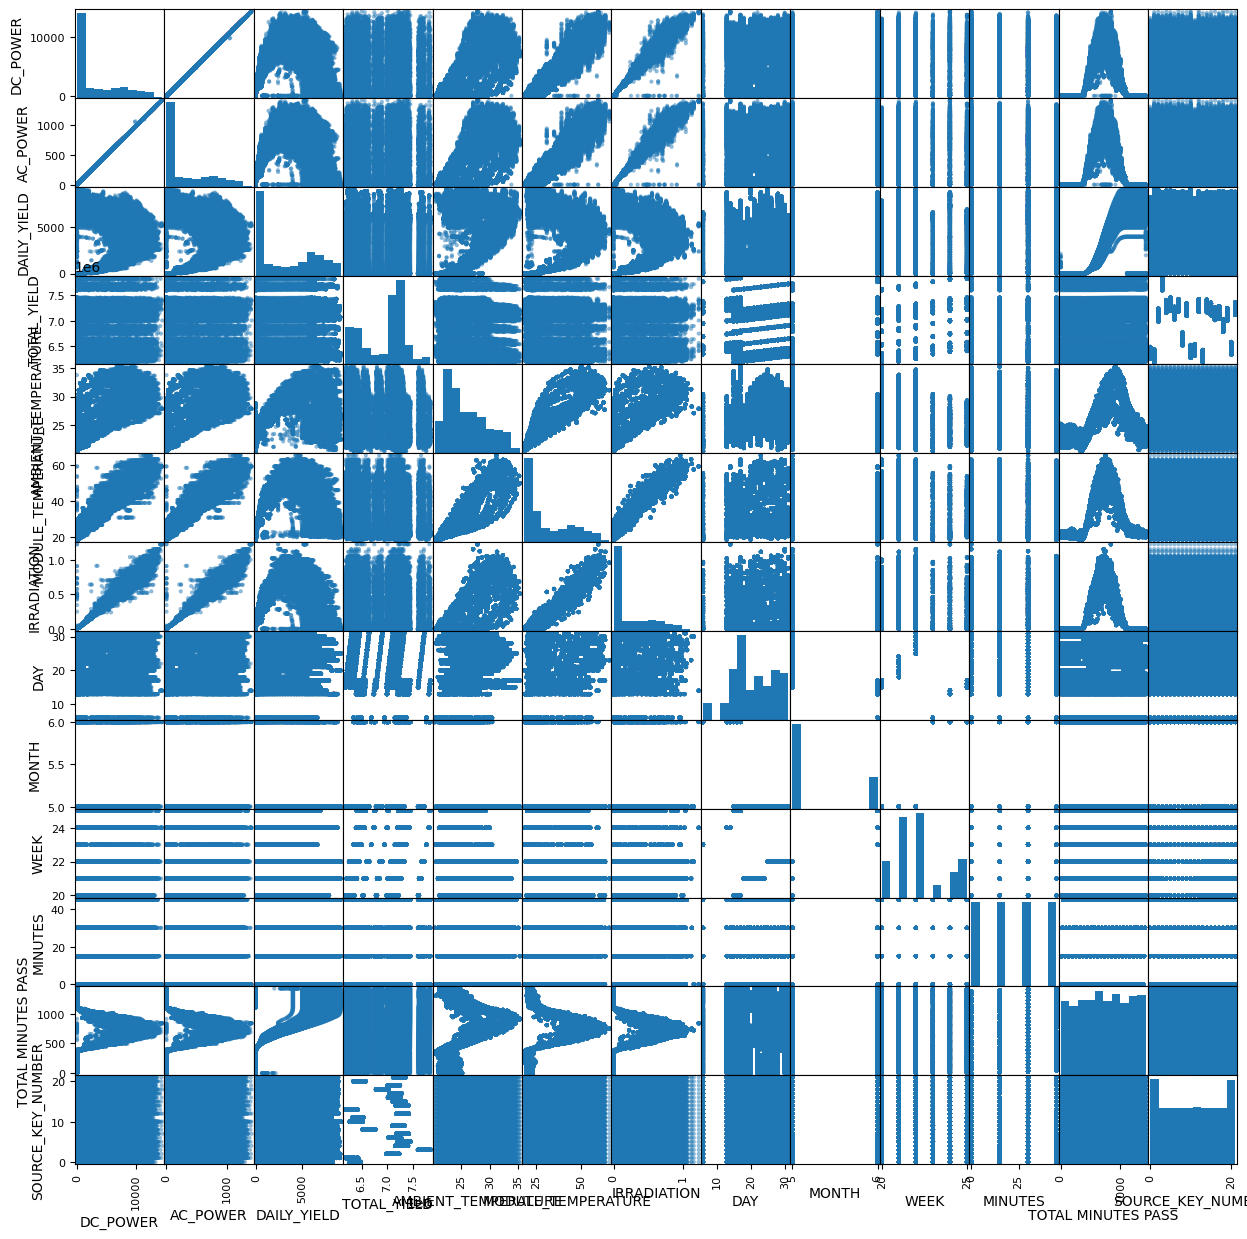

In [89]:
#correlation

pd.plotting.scatter_matrix(data, figsize=(15,15))

plt.show()

### creates a scatter matrix plot ,a scatter matrix plot is a grid of scatter plots that allows us to visualize the pairwise relationships between multiple variables in a dataset

#### calculate the correlation matrix


In [90]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DAY,MONTH,WEEK,MINUTES,TOTAL MINUTES PASS,SOURCE_KEY_NUMBER
DC_POWER,1.000000,0.999996,0.076710,0.004055,0.703796,0.954692,0.991305,0.049284,-0.042781,-0.029993,-0.000089,0.012161,0.001987
AC_POWER,0.999996,1.000000,0.076628,0.004043,0.704035,0.954810,0.991260,0.049162,-0.042688,-0.029943,-0.000099,0.012131,0.001990
DAILY_YIELD,0.076710,0.076628,1.000000,0.007277,0.489709,0.203702,0.071937,0.030742,-0.012850,-0.008640,0.015915,0.823653,-0.016097
TOTAL_YIELD,0.004055,0.004043,0.007277,1.000000,-0.036532,-0.014713,-0.004981,-0.053243,0.167196,0.182590,0.000088,0.005257,0.039886
AMBIENT_TEMPERATURE,0.703796,0.704035,0.489709,-0.036532,1.000000,0.843456,0.702218,0.164977,-0.237136,-0.214439,-0.000860,0.322871,-0.001363
MODULE_TEMPERATURE,0.954692,0.954810,0.203702,-0.014713,0.843456,1.000000,0.959346,0.105859,-0.116531,-0.092254,-0.003603,0.103610,0.000343
IRRADIATION,0.991305,0.991260,0.071937,-0.004981,0.702218,0.959346,1.000000,0.056562,-0.051316,-0.037322,-0.001372,0.009203,0.000925
DAY,0.049284,0.049162,0.030742,-0.053243,0.164977,0.105859,0.056562,1.000000,-0.678315,-0.282778,-0.001047,0.015635,-0.002701
MONTH,-0.042781,-0.042688,-0.012850,0.167196,-0.237136,-0.116531,-0.051316,-0.678315,1.000000,0.882285,0.000818,-0.012040,-0.001248
WEEK,-0.029993,-0.029943,-0.008640,0.182590,-0.214439,-0.092254,-0.037322,-0.282778,0.882285,1.000000,0.000426,-0.008505,-0.002838


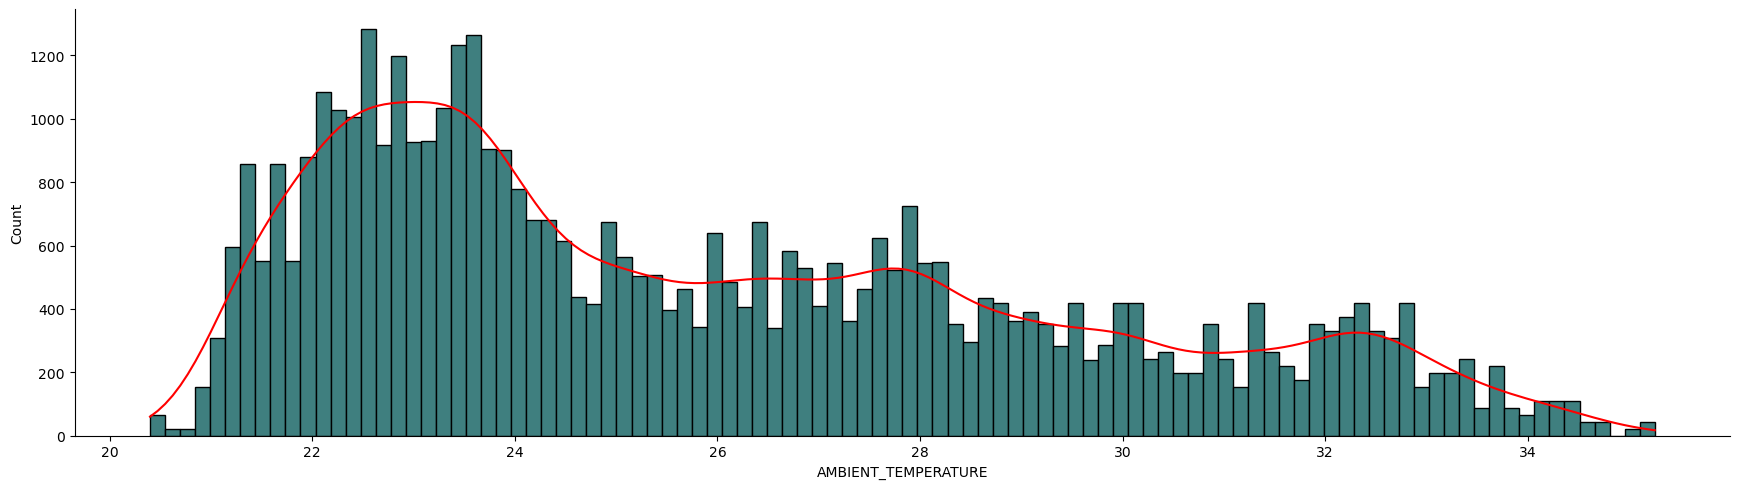

In [91]:
# displot function to create a histogram with a kernel density estimate (KDE) for the "AMBIENT_TEMPERATURE" 

sns.displot(data=data, x="AMBIENT_TEMPERATURE", kde=True, bins = 100,color = "red", facecolor = "#3F7F7F",height = 5, aspect = 3.5);

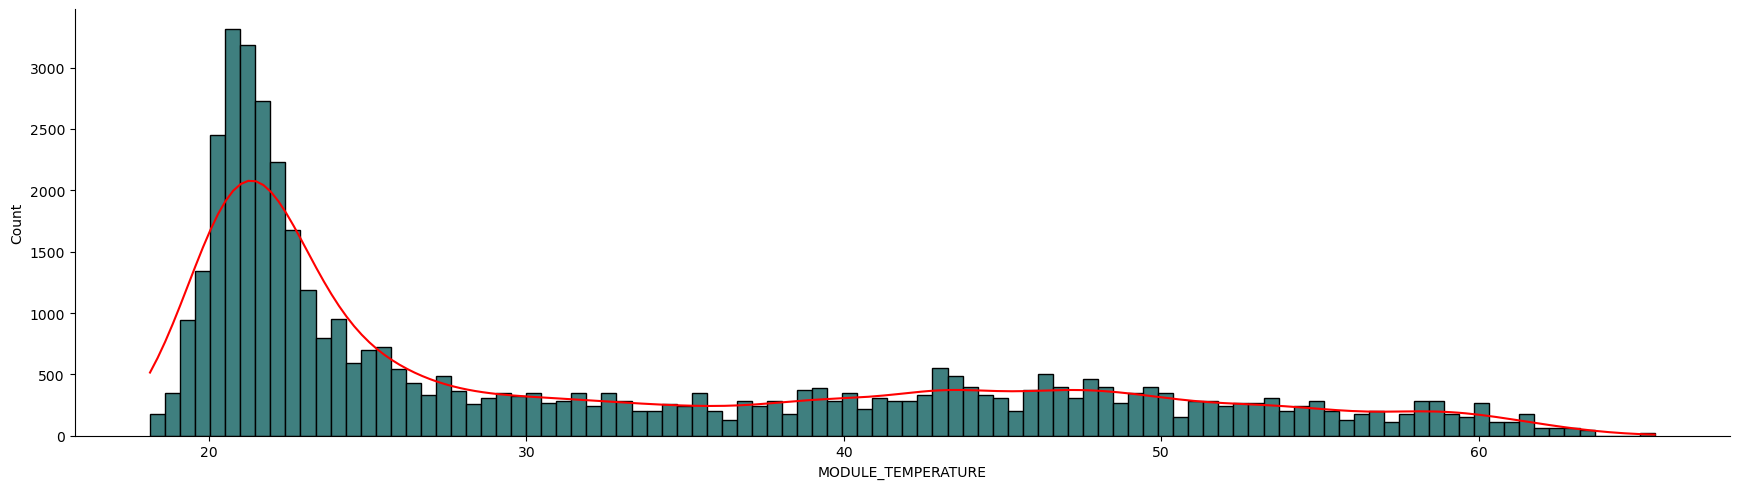

In [92]:
# displot function to create a histogram with a kernel density estimate (KDE) for the "MODULE_TEMPERATURE" 

sns.displot(data=data, x="MODULE_TEMPERATURE", kde=True, bins = 100,color = "red", facecolor = "#3F7F7F",height = 5, aspect = 3.5);

## Count of days the data is collected for.

In [93]:
data['DATE'].nunique()

23

## The data of solar power generation is of 23 days


## DC Power Generation per day

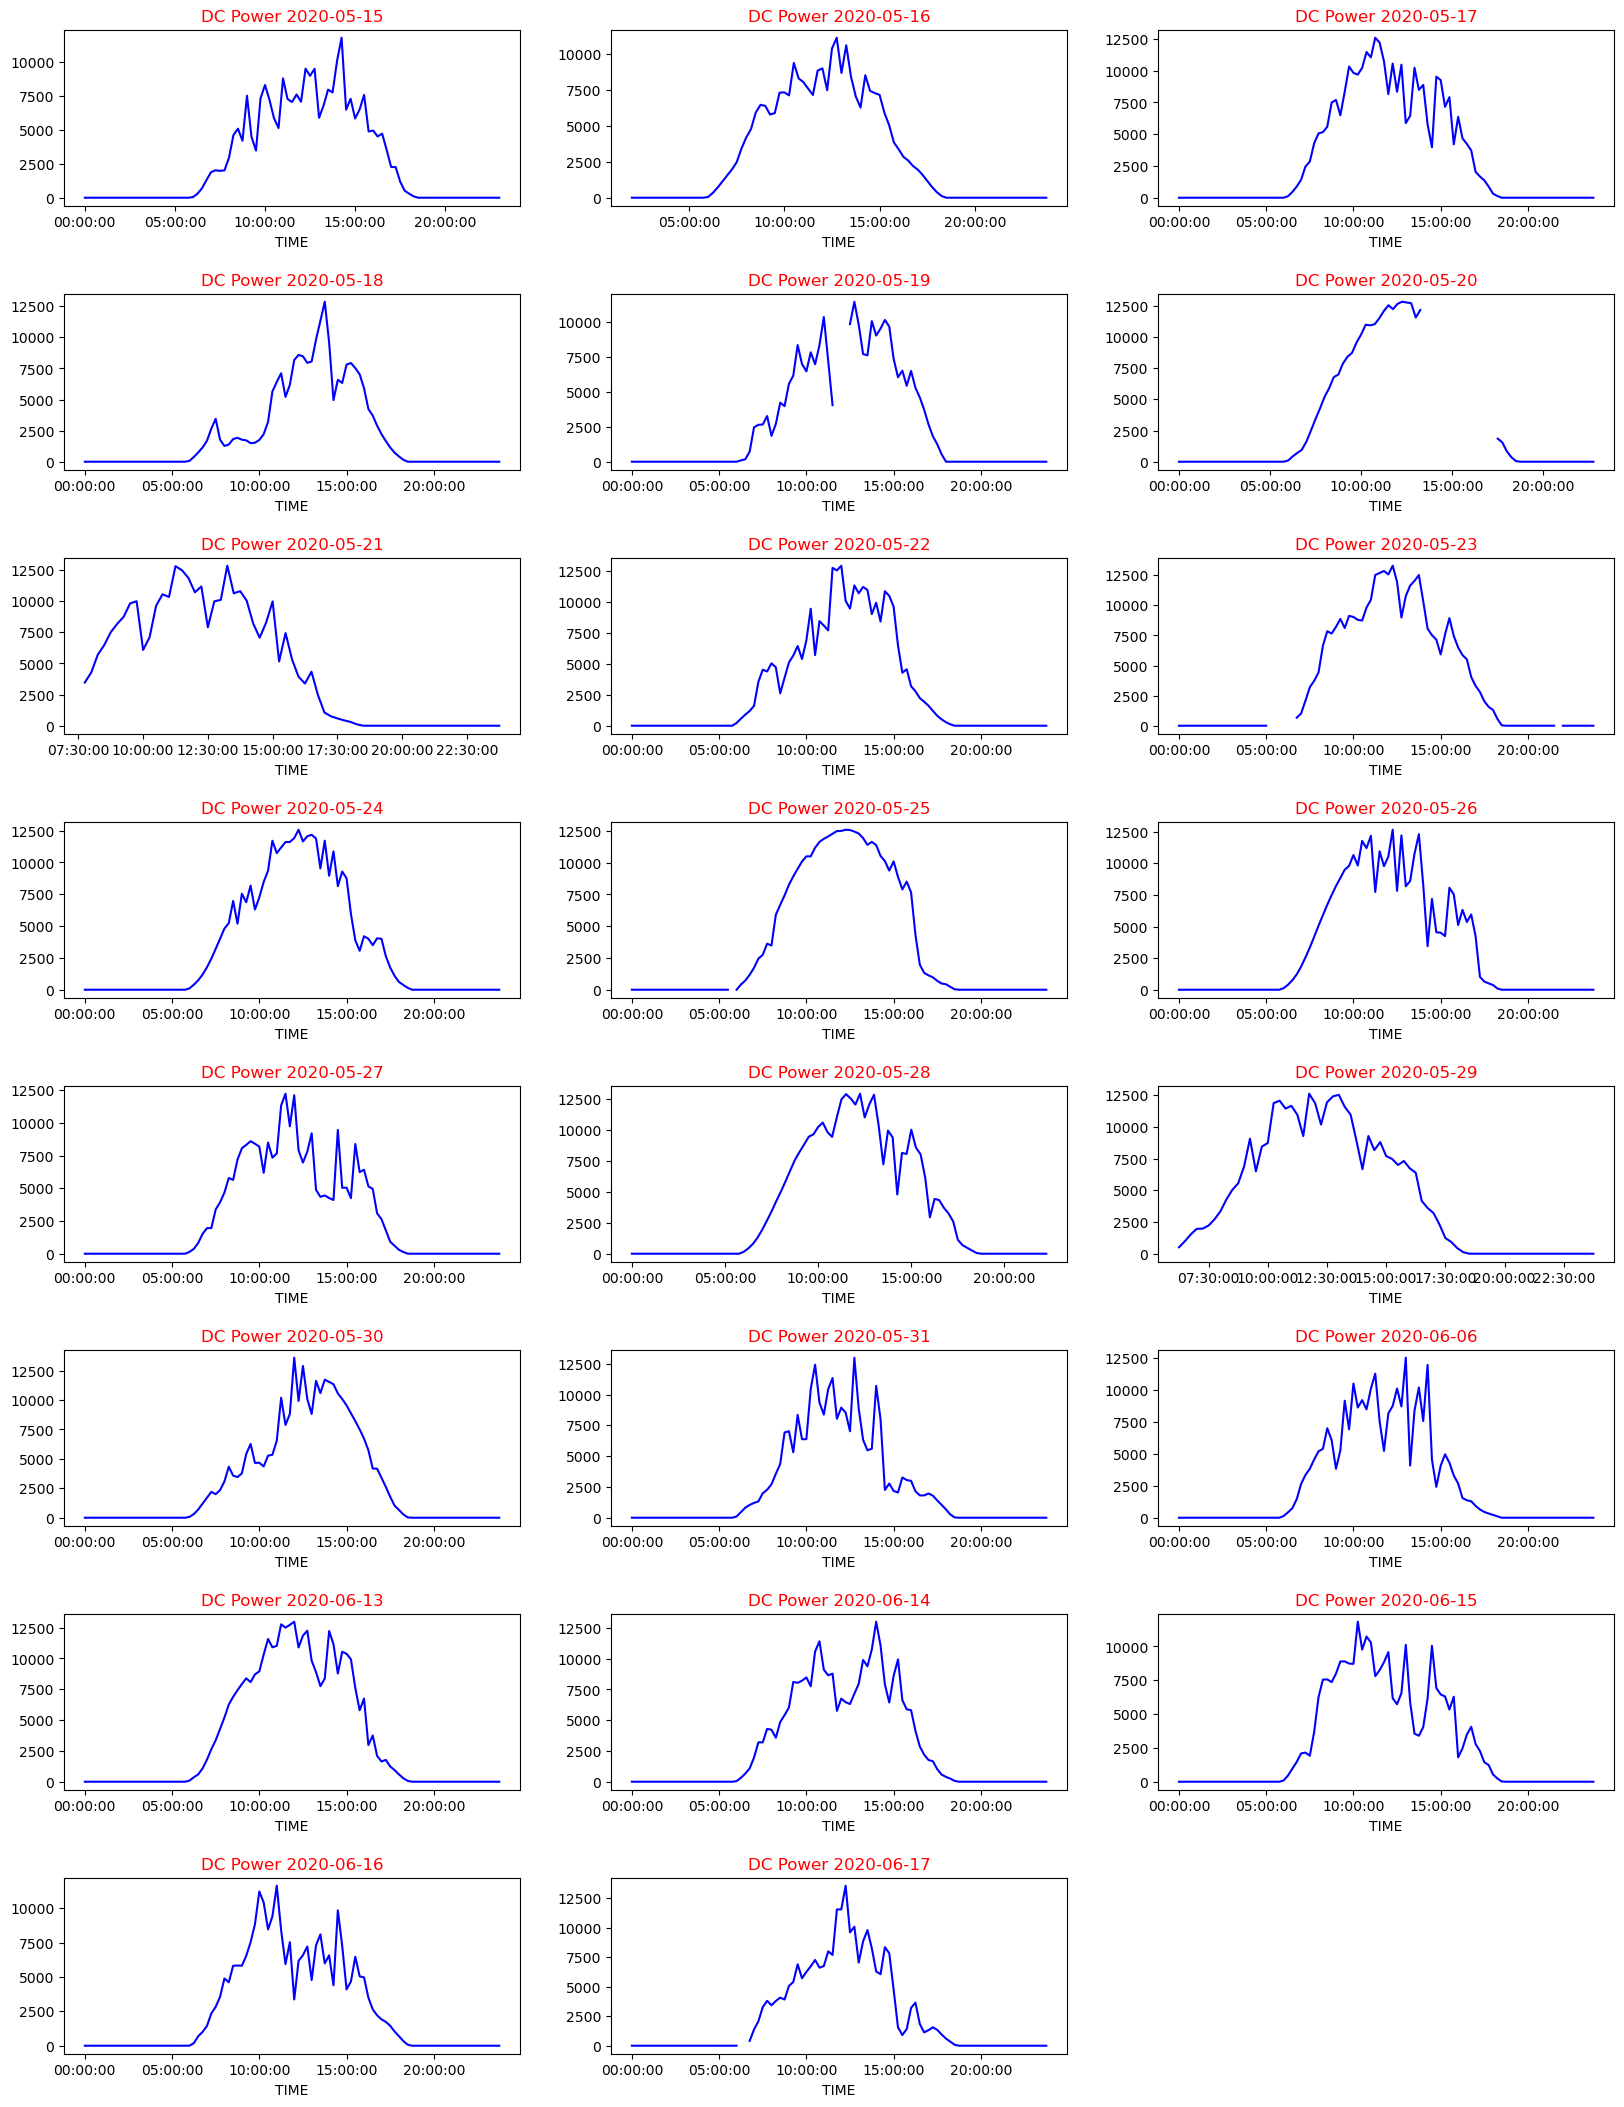

In [94]:
solar_dc = data.pivot_table(values='DC_POWER', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='DC Power'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40)) 
    
    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='blue')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='red')
        
Daywise_plot(data=solar_dc, row=12, col=3)

The above plot shows that there is some fluctuation in the power generation. 

Less Fluctuation in DC power generation is observed in the below mentioned days.

    2020-05-15
    2020-05-18
    2020-05-22
    2020-05-23
    2020-05-24
    2020-05-25
    2020-05-26

High Fluctuation in DC power generation is observed in the below mentioned days.

    2020-05-19
    2020-05-28
    2020-05-29
    2020-06-02
    2020-06-03
    2020-06-04
    2020-06-13
    2020-06-14
    2020-06-17

Very High Fluctuation & Reduction in DC power generation is observed in in the below mentioned days.

    2020-06-03
    2020-06-11
    2020-06-12
    2020-06-15

Note: Reason for very high Fluctuation & Reduction in DC Power generation could be due to fault in the system or may be
    fluctuation in weather or due to clouds etc. which need to be analyse further

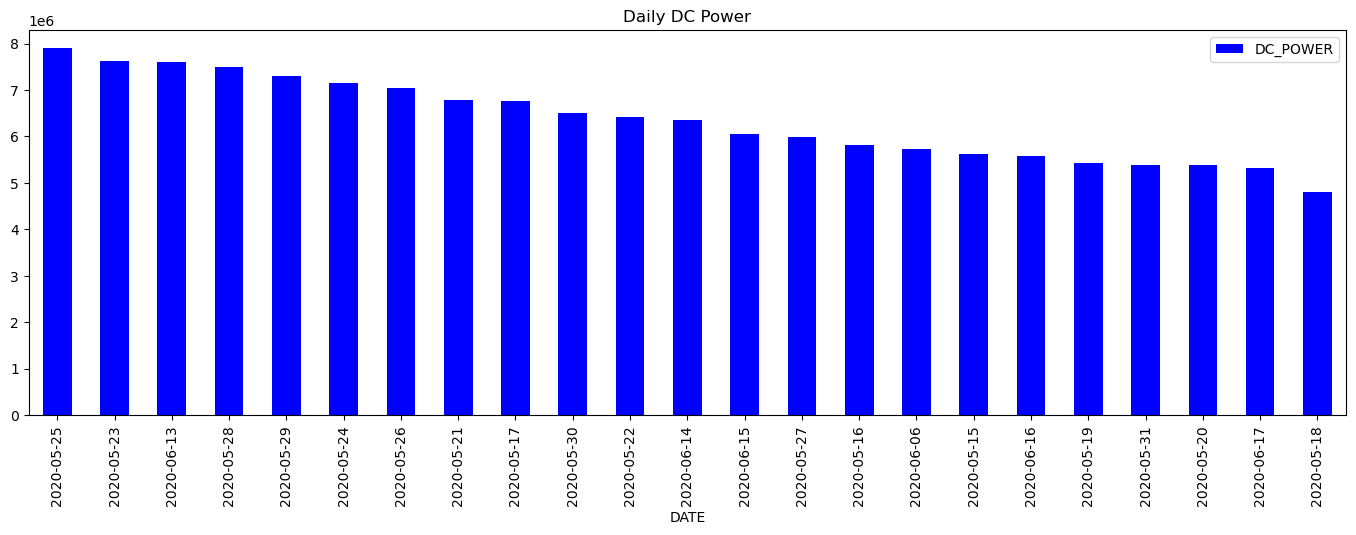

In [95]:
#  group the data by the 'DATE' and calculate the sum of 'DC_POWER' for each date

daily_dc = data.groupby('DATE')['DC_POWER'].agg('sum')

ax = daily_dc.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='blue')
plt.title('Daily DC Power')
plt.show()

Highest average DC_POWER Generation is on: 2020-05-25
Lowest average DC_POWER Generation is on : 2020-05-18

## Irradiation Generation per day

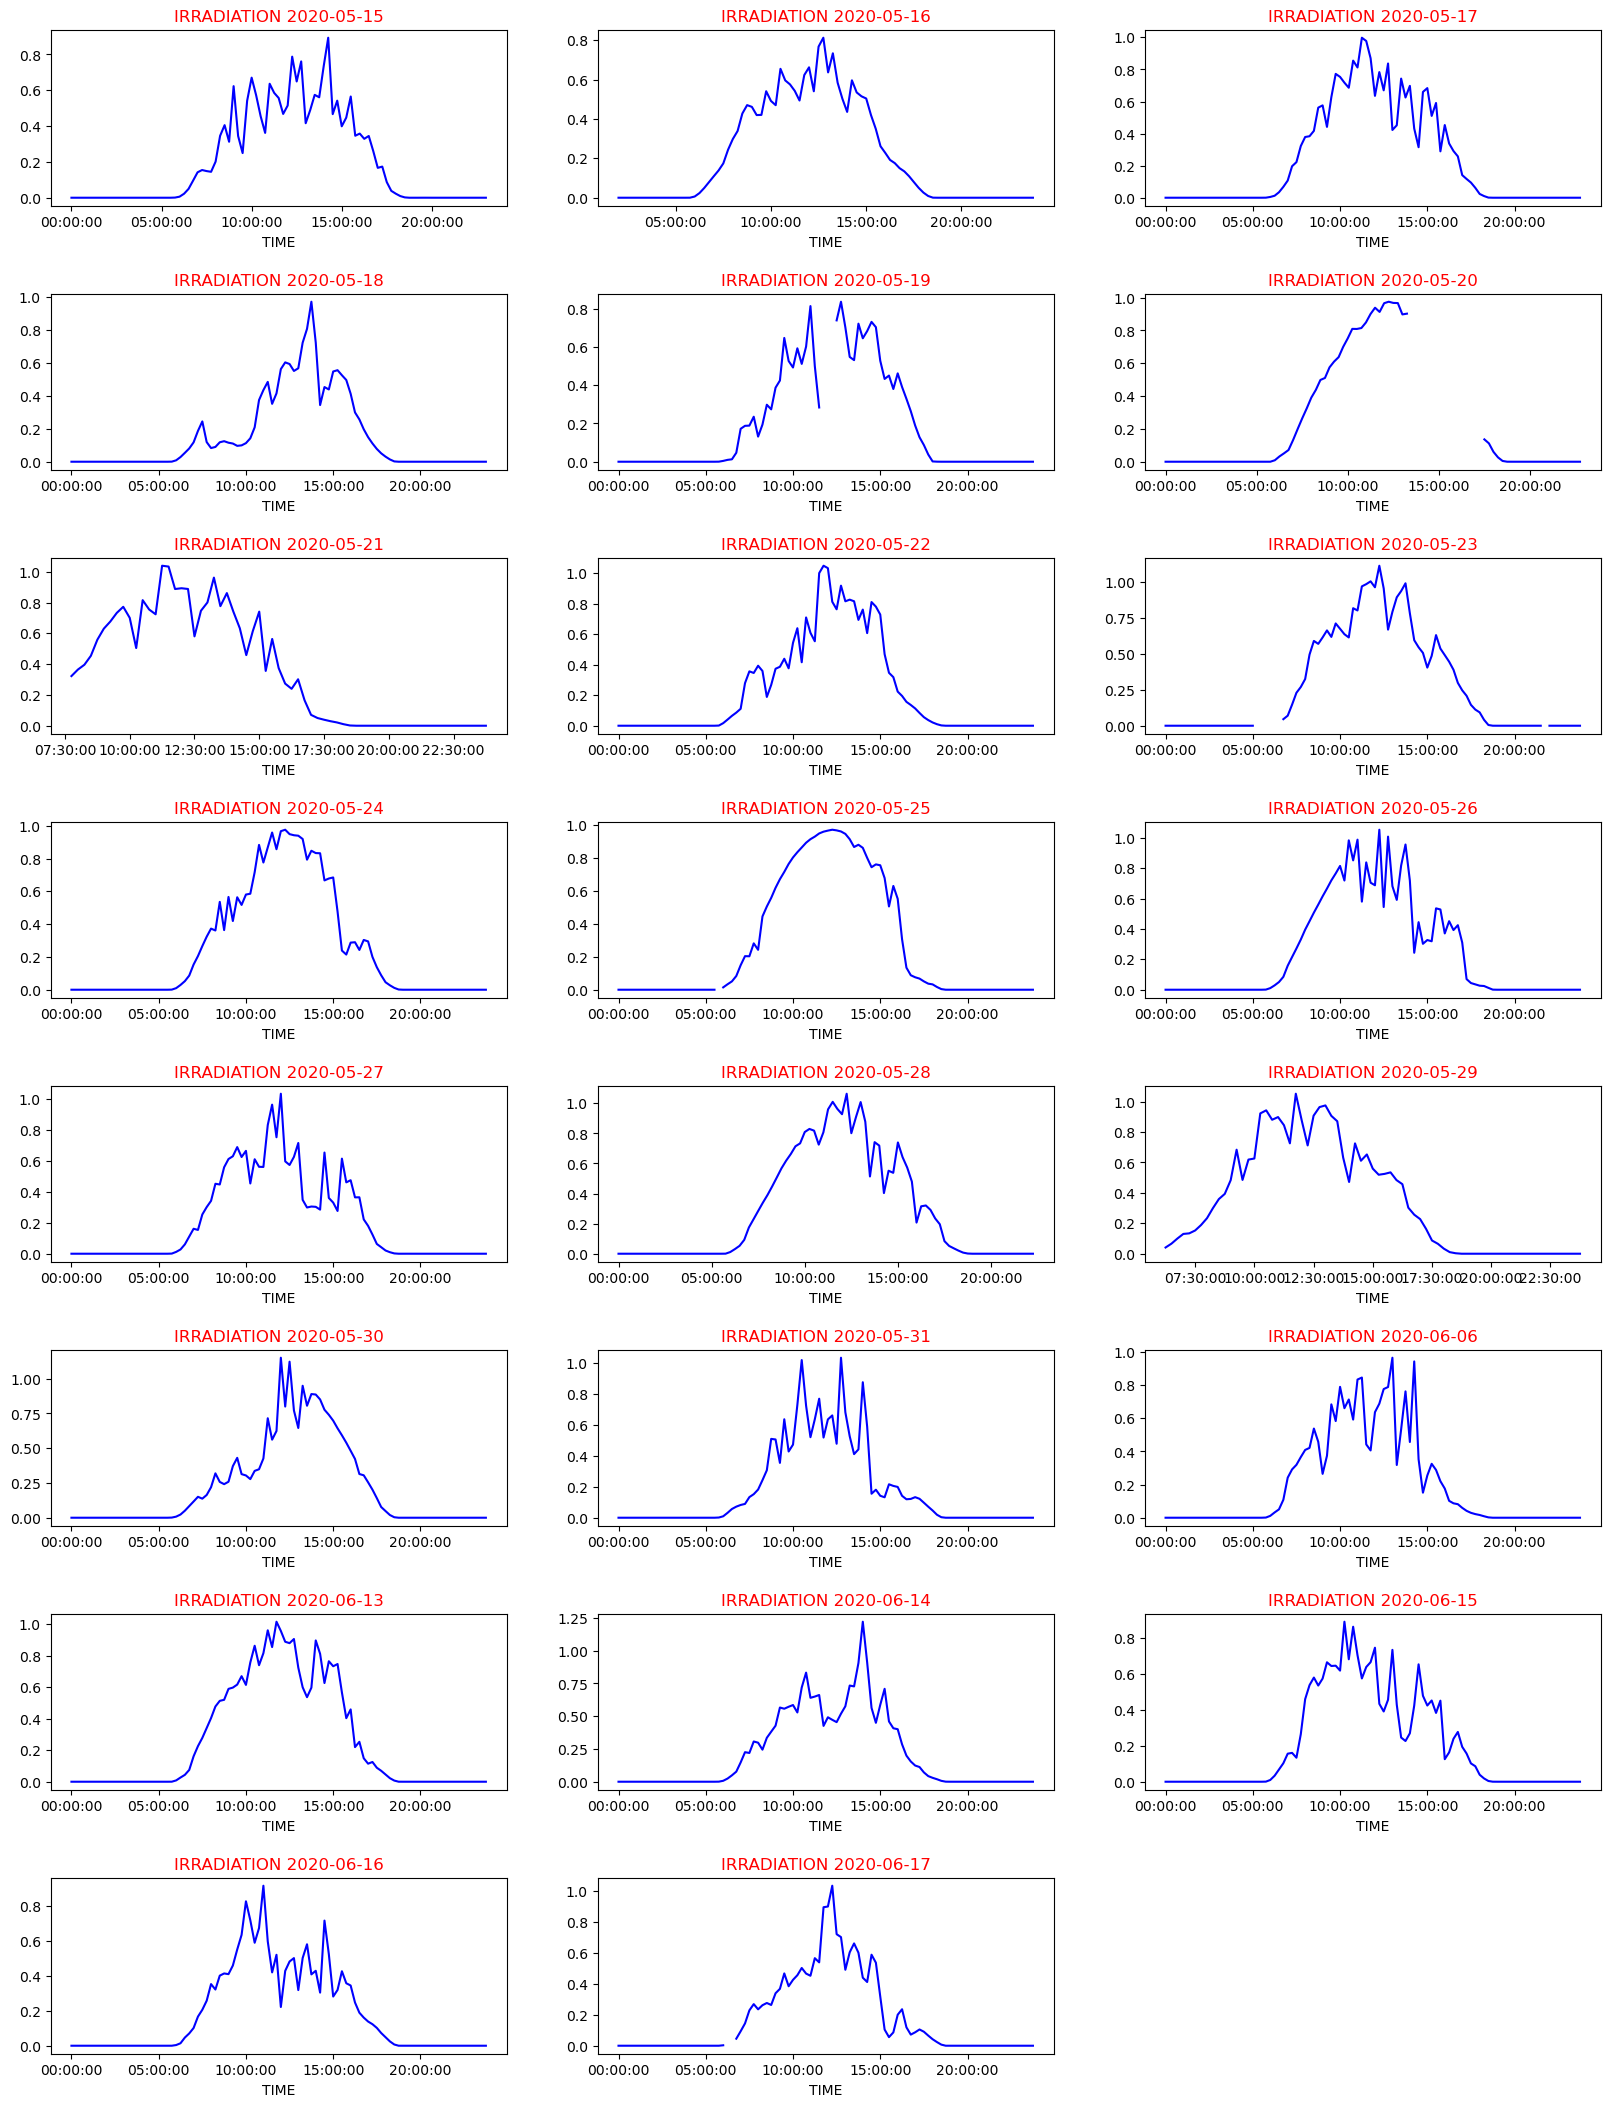

In [96]:
solar_irradiation = data.pivot_table(values='IRRADIATION', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='IRRADIATION'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40)) 
    
    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='blue')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='red')
        
Daywise_plot(data=solar_irradiation, row=12, col=3)

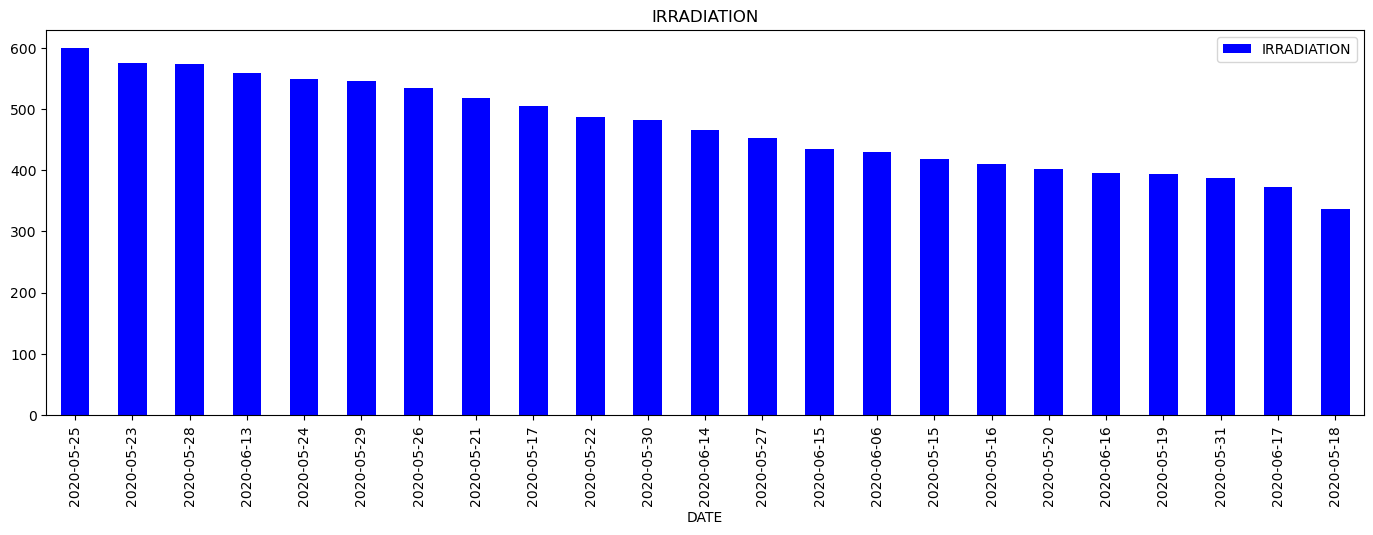

In [97]:
# groups the data by the 'DATE' and calculates the sum of 'IRRADIATION' for each date

daily_irradiation = data.groupby('DATE')['IRRADIATION'].agg('sum')

daily_irradiation.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='blue')
plt.title('IRRADIATION')
plt.show()

Highest average IRRADIATION is on: 2020-05-25
Lowest average IRRADIATION is on : 2020-05-18

## Ambient Temperature per day

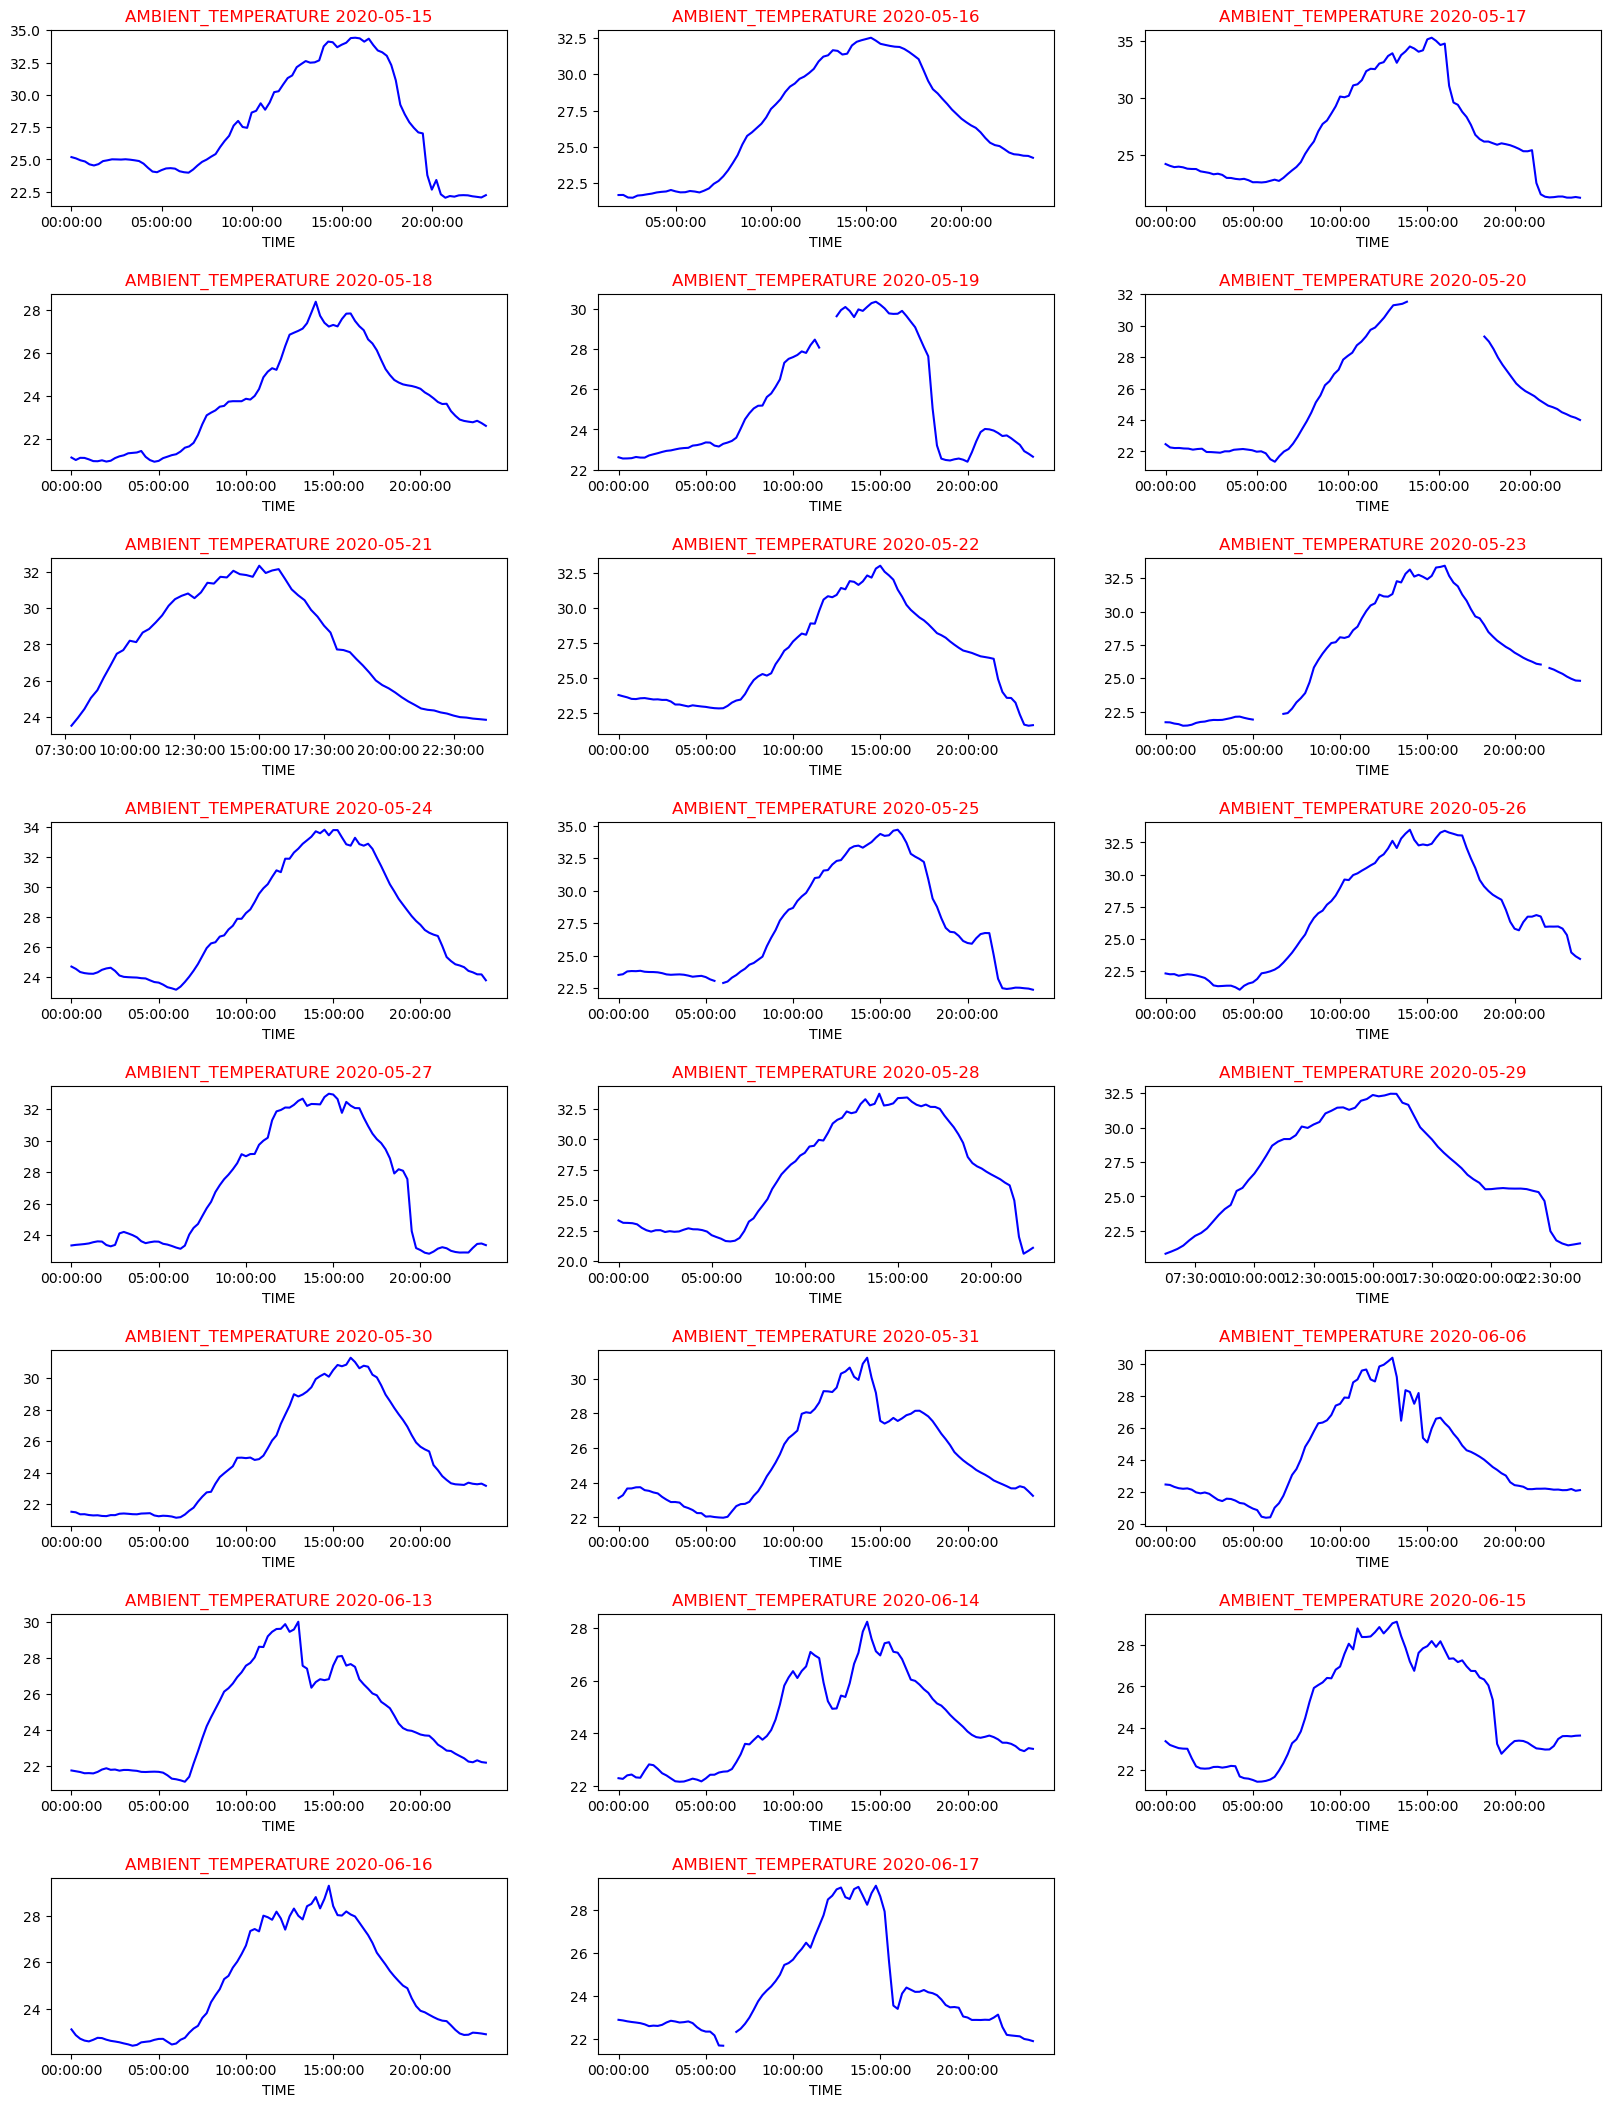

In [98]:
solar_ambiant_temp = data.pivot_table(values='AMBIENT_TEMPERATURE', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='AMBIENT_TEMPERATURE'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40)) 
    
    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='blue')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='red')
        
Daywise_plot(data=solar_ambiant_temp, row=12, col=3)

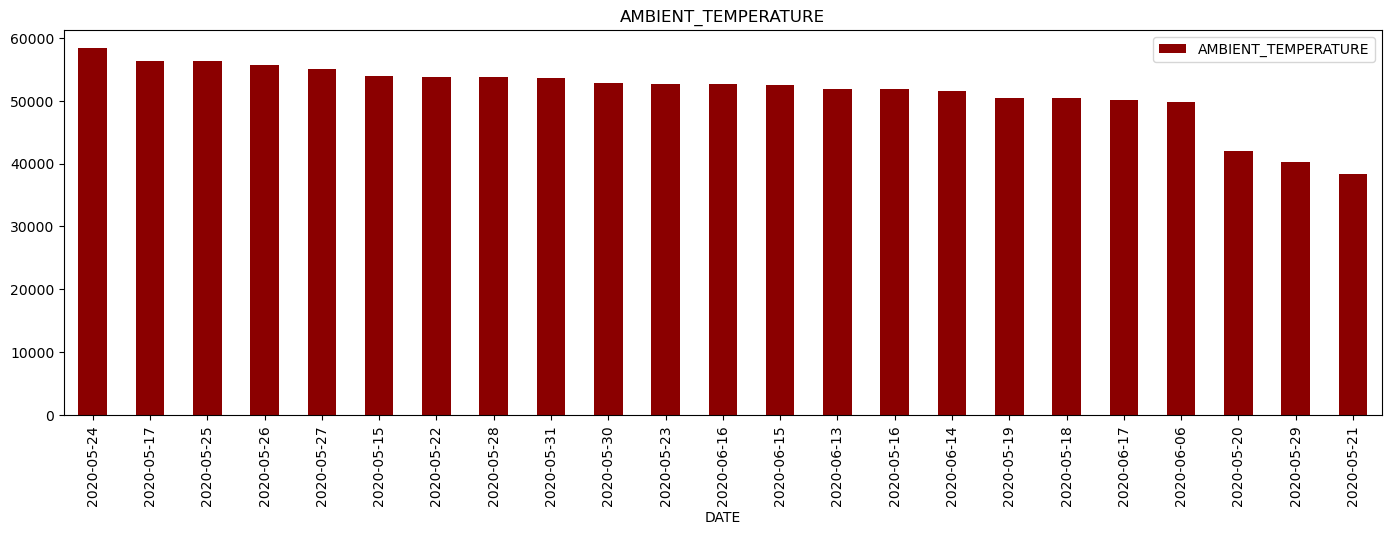

In [99]:
# groups the data by the 'DATE' and calculates the sum of 'AMBIENT_TEMPERATURE' for each date

daily_ambient_temp = data.groupby('DATE')['AMBIENT_TEMPERATURE'].agg('sum')

daily_ambient_temp.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='darkred')
plt.title('AMBIENT_TEMPERATURE')
plt.show()

Highest average DC_POWER is generated on "2020-05-25"

## Comparision between Best and Worst Power generation

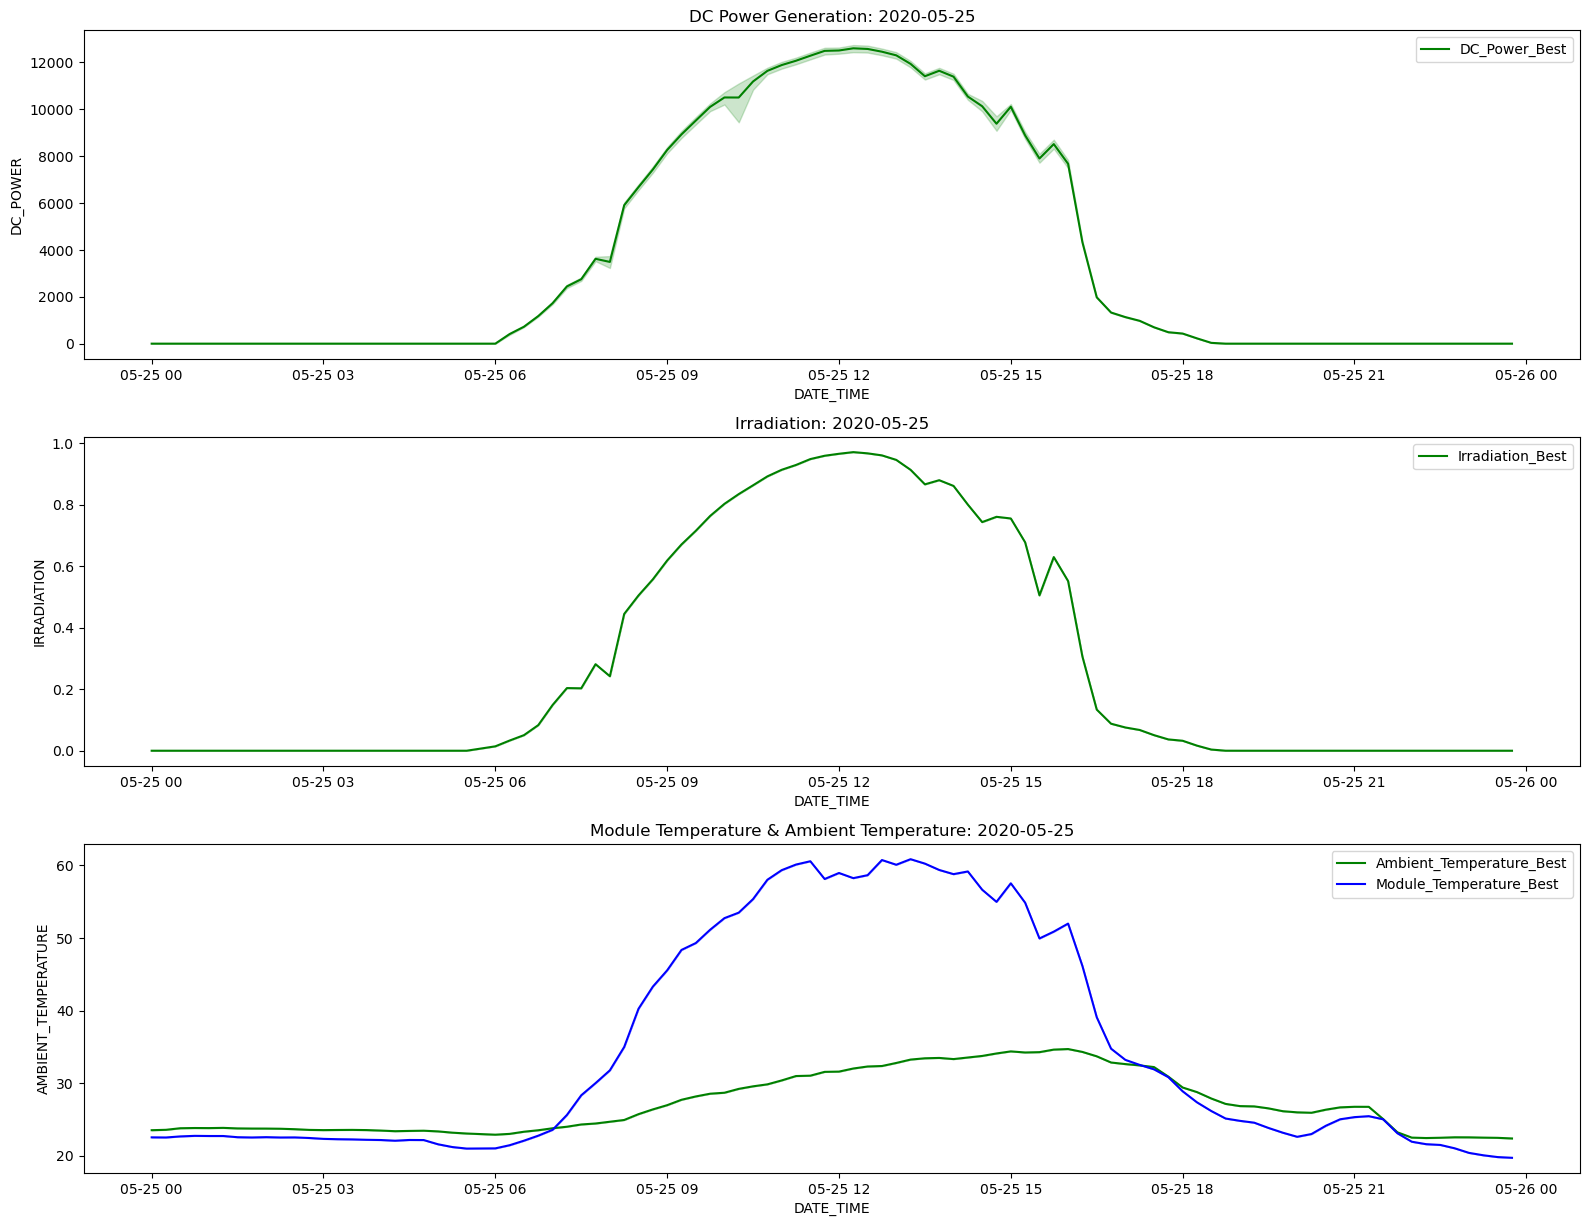

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 16))

date = ["2020-05-25"]

plt.subplot(411)
sns.lineplot(x=data[data["DATE_STRING"].isin(date)].DATE_TIME, y=data[data["DATE_STRING"].isin(date)].DC_POWER, label="DC_Power_Best", color='green')
plt.title("DC Power Generation: {}".format(date[0]))

plt.subplot(412)
sns.lineplot(x=data[data["DATE_STRING"].isin(date)].DATE_TIME, y=data[data["DATE_STRING"].isin(date)].IRRADIATION, label="Irradiation_Best", color='green')
plt.title("Irradiation: {}".format(date[0]))

plt.subplot(413)
sns.lineplot(x=data[data["DATE_STRING"].isin(date)].DATE_TIME, y=data[data["DATE_STRING"].isin(date)].AMBIENT_TEMPERATURE, label="Ambient_Temperature_Best", color='green')
sns.lineplot(x=data[data["DATE_STRING"].isin(date)].DATE_TIME, y=data[data["DATE_STRING"].isin(date)].MODULE_TEMPERATURE, label="Module_Temperature_Best", color='blue')
plt.title("Module Temperature & Ambient Temperature: {}".format(date[0]))

plt.tight_layout()
plt.show()

Lowest average DC_POWER is generated on "2020-06-18"

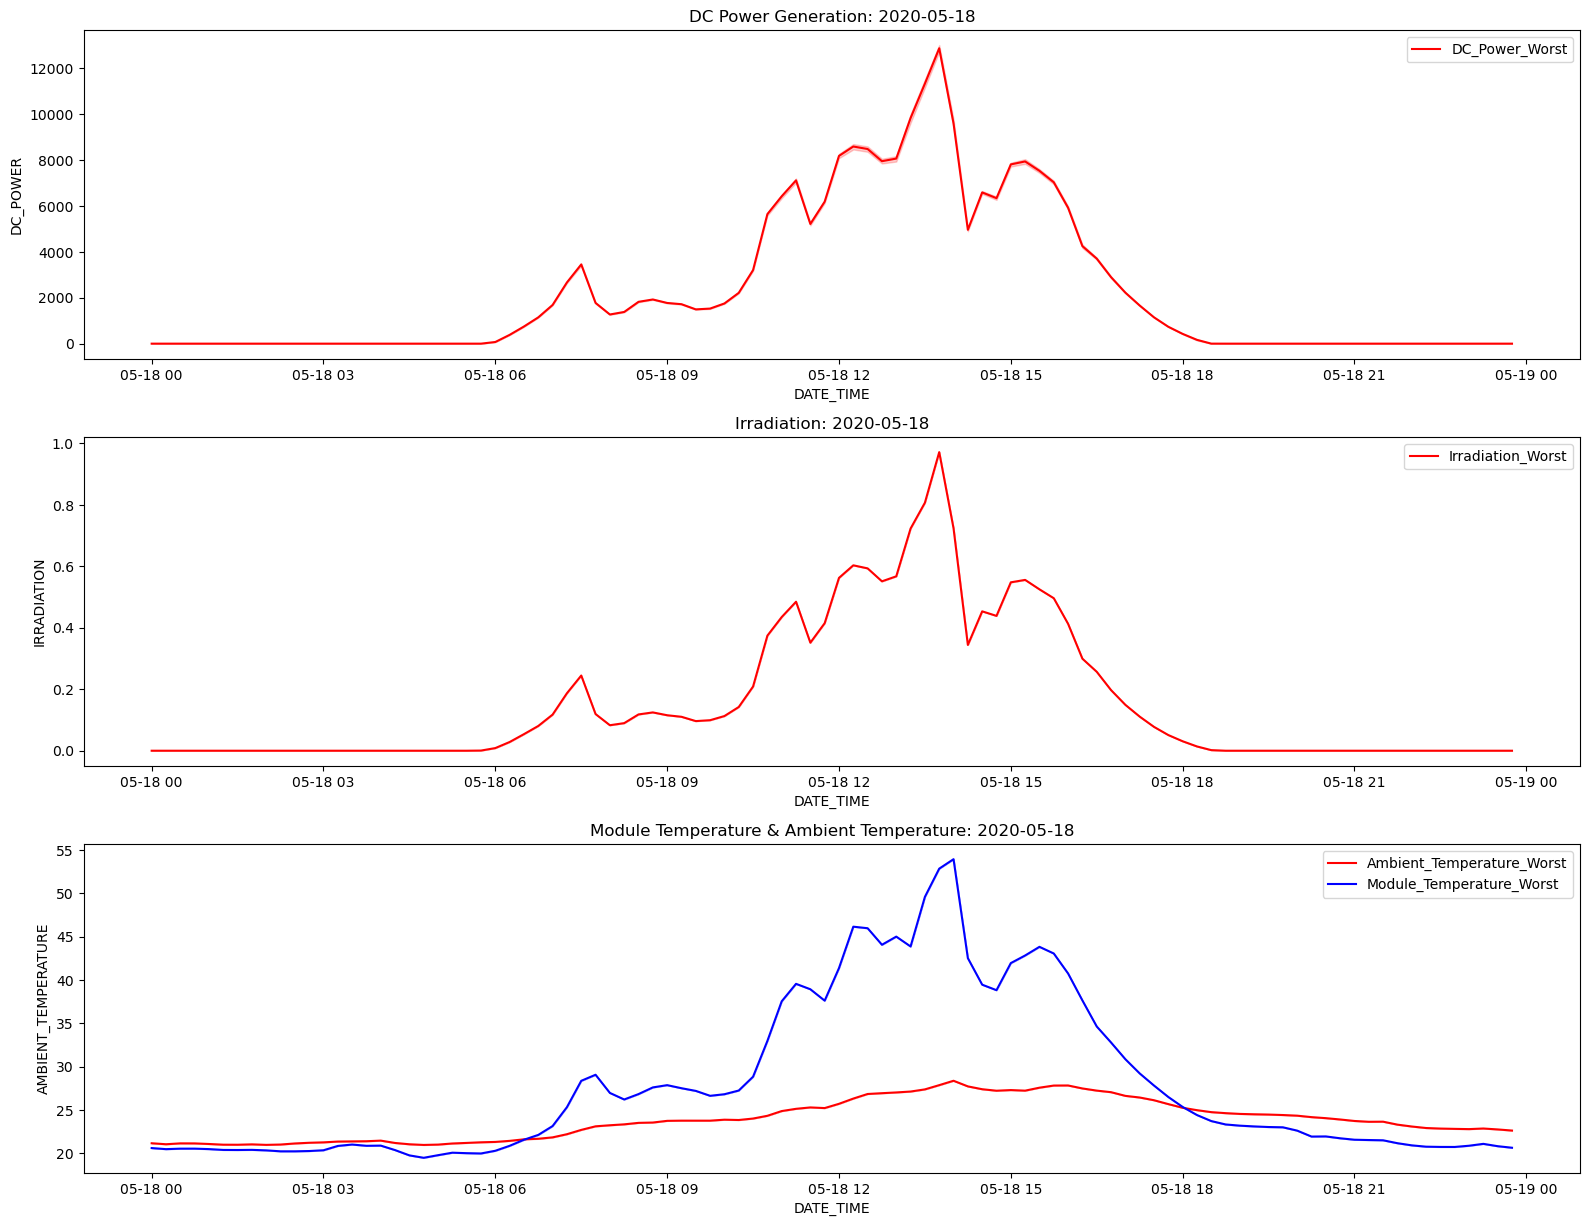

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

date = ["2020-05-18"]
plt.figure(figsize=(16, 16))

plt.subplot(411)
sns.lineplot(x=data[data["DATE_STRING"].isin(date)].DATE_TIME, y=data[data["DATE_STRING"].isin(date)].DC_POWER, label="DC_Power_Worst", color='red')
plt.title("DC Power Generation: {}".format(date[0]))

plt.subplot(412)
sns.lineplot(x=data[data["DATE_STRING"].isin(date)].DATE_TIME, y=data[data["DATE_STRING"].isin(date)].IRRADIATION, label="Irradiation_Worst", color='red')
plt.title("Irradiation: {}".format(date[0]))

plt.subplot(413)
sns.lineplot(x=data[data["DATE_STRING"].isin(date)].DATE_TIME, y=data[data["DATE_STRING"].isin(date)].AMBIENT_TEMPERATURE, label="Ambient_Temperature_Worst", color='red')
sns.lineplot(x=data[data["DATE_STRING"].isin(date)].DATE_TIME, y=data[data["DATE_STRING"].isin(date)].MODULE_TEMPERATURE, label="Module_Temperature_Worst", color='blue')
plt.title("Module Temperature & Ambient Temperature: {}".format(date[0]))

plt.tight_layout()
plt.show()


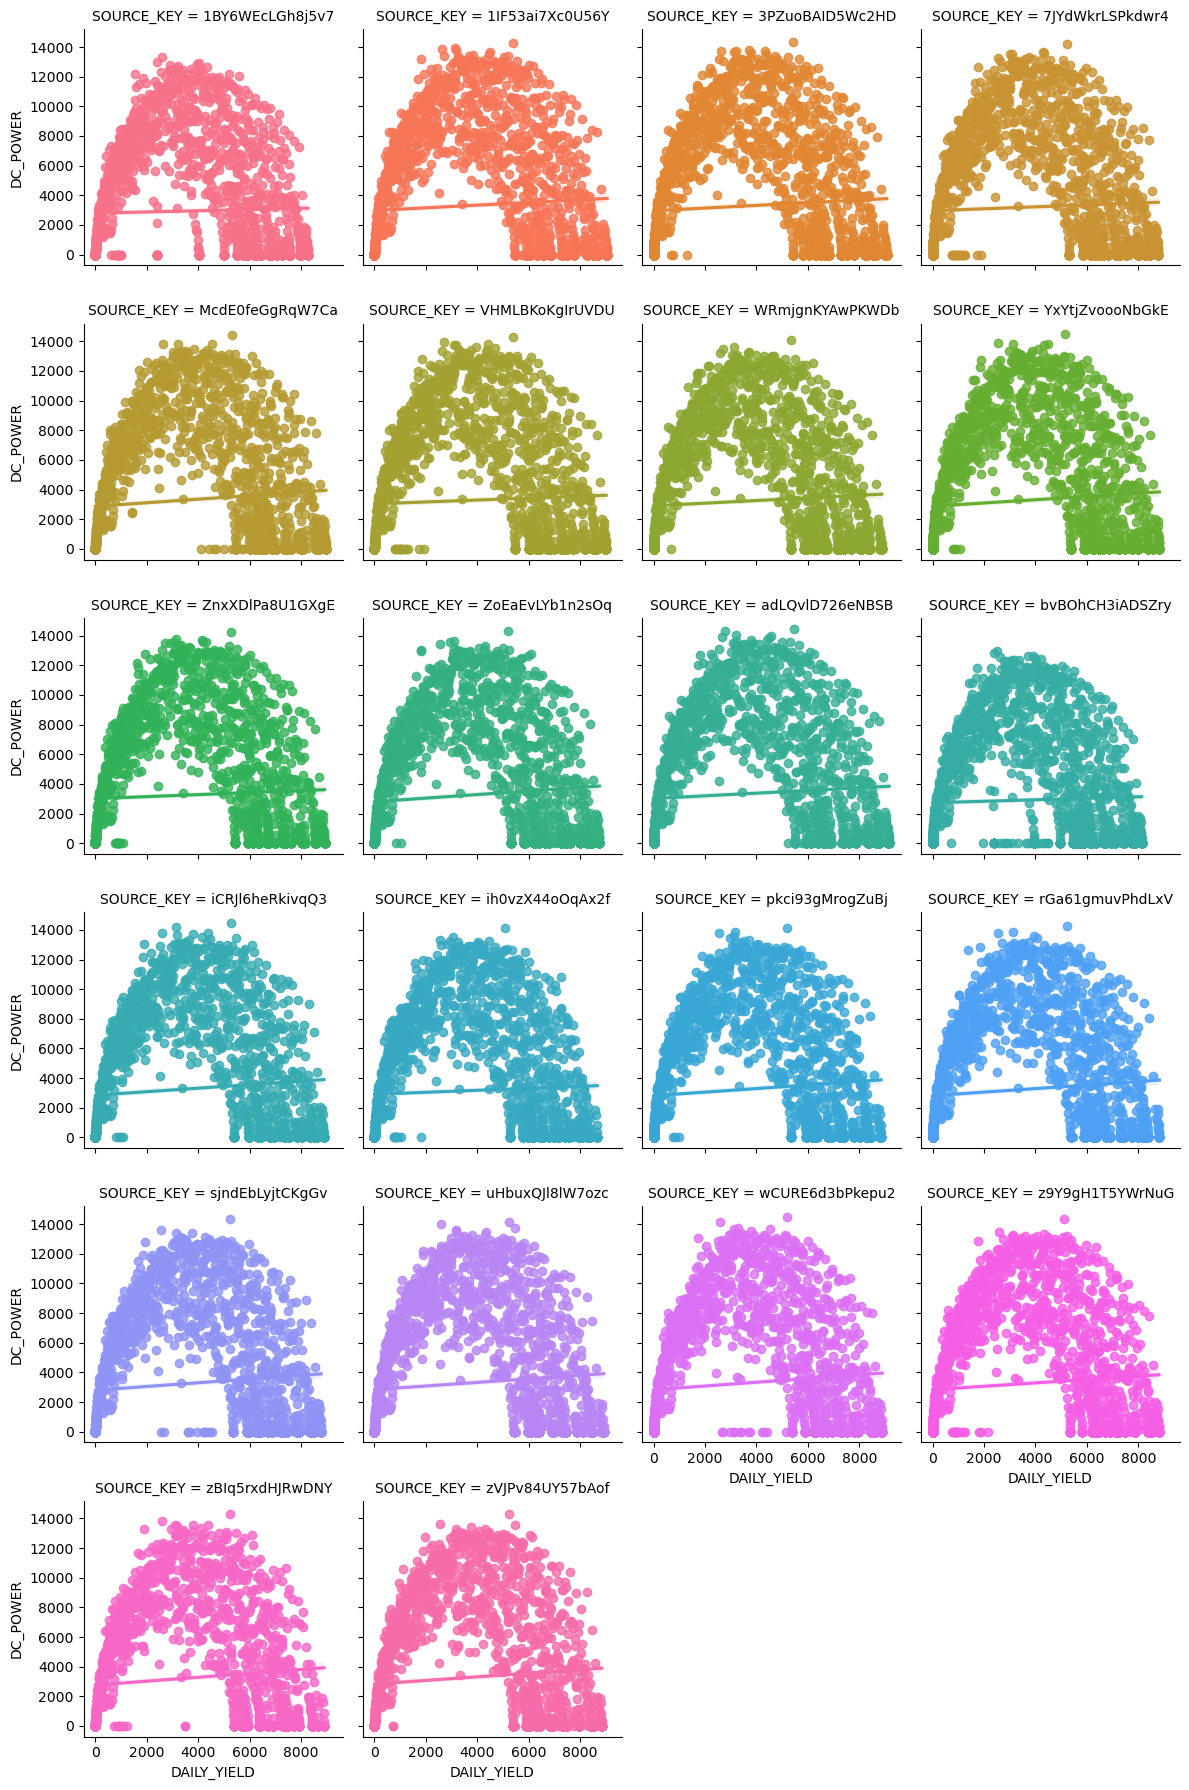

In [102]:
#  to create a scatter plot which plots the relationship between 'DC_POWER' (y-axis) and 'DAILY_YIELD' (x-axis) attributes for each 'SOURCE_KEY' value. 

sns.lmplot(y="DC_POWER",x="DAILY_YIELD",hue="SOURCE_KEY",col="SOURCE_KEY",height=3,col_wrap=4,data=data,fit_reg=True);

## Solar Power Plant Inverter Efficiency Calculation

In [103]:
solar_dc_power = data[data['DC_POWER'] > 0]['DC_POWER'].values
solar_ac_power = data[data['AC_POWER'] > 0]['AC_POWER'].values

In [104]:
solar_dc_power.max()

14471.125

In [105]:
solar_ac_power.max()

1410.95

In [106]:
solar_plant_eff = (np.max(solar_ac_power)/np.max(solar_dc_power ))*100
print(f"Power conversion Efficiency ratio AC/DC of Solar Power Plant:  {solar_plant_eff:0.3f} %")

Power conversion Efficiency ratio AC/DC of Solar Power Plant:  9.750 %


# 4. Splitting Data into Training & Testing sets

In [107]:
# create a copy of 'data' and assign it to a new DataFrame called df_ml
df_ml = data.copy()

X = data[['DAILY_YIELD', 'TOTAL_YIELD', 'AMBIENT_TEMPERATURE', 'IRRADIATION']]
y = data['AC_POWER']

In [108]:
# correlation matrix of the DataFrame X using the .corr() method

corr = X.corr()
corr.style.background_gradient(cmap='coolwarm')

,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,IRRADIATION
DAILY_YIELD,1.000000,0.007277,0.489709,0.071937
TOTAL_YIELD,0.007277,1.000000,-0.036532,-0.004981
AMBIENT_TEMPERATURE,0.489709,-0.036532,1.000000,0.702218
IRRADIATION,0.071937,-0.004981,0.702218,1.000000


In [109]:
# split dataset into training and testing subsets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

# 5. Model Training & 6. Model Evaluation

## Solar Power Prediction using different ML techniques

## 1. Linear Regression

In [110]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

In [111]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
R2_Score_lr = round(r2_score(y_pred_lr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_lr,"%")

R2 Score :  98.28 %


In [112]:
from sklearn.metrics import mean_squared_error

y_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")

Mean Squared Error (MSE): 2719.2198


In [113]:
import numpy as np

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Root Mean Squared Error (RMSE): 52.1461


In [114]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

Mean Absolute Error (MAE): 26.1081


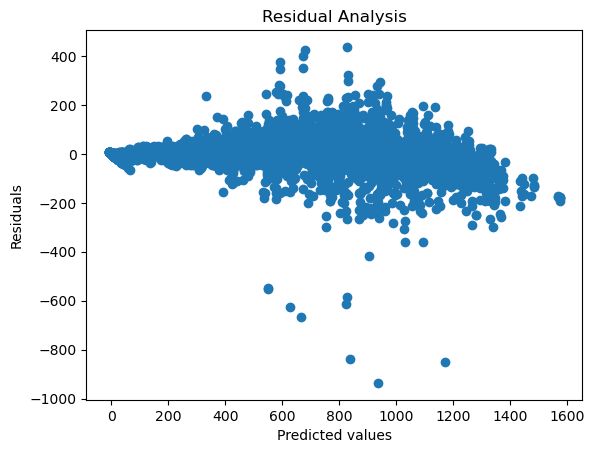

In [115]:
residuals = y_test - y_pred

# Plotting residuals
import matplotlib.pyplot as plt

plt.scatter(y_pred, residuals)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.show()

## Saving our Linear Regression model

In [116]:
joblib.dump(lr_model, 'LR.pkl') 

['LR.pkl']

## 2. KNN

In [117]:
from sklearn import neighbors

score_list = []
n_neighbors_list = []

# for loop to find best fitting n_neighbor value
for i in range(1, 21):
    knn = neighbors.KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)

    knn_score = knn.score(X_test, y_test)

    score_list.append(knn_score)
    n_neighbors_list.append(i)

best_n_neighbor = n_neighbors_list[score_list.index(max(score_list))]
print(f"Best n_neighbor at {best_n_neighbor} with {max(score_list)*100:.4f} %")

Best n_neighbor at 3 with 88.1421 %


In [118]:
from sklearn.metrics import mean_squared_error

knn = neighbors.KNeighborsRegressor(n_neighbors=best_n_neighbor)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")

Mean Squared Error (MSE): 19028.8275


In [119]:
import numpy as np

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Root Mean Squared Error (RMSE): 137.9450


In [120]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

Mean Absolute Error (MAE): 66.3668


In [121]:
r2 = knn.score(X_test, y_test)
print(f"R-squared: {r2:.4f}")

R-squared: 0.8814


In [122]:
from sklearn.metrics import explained_variance_score

explained_variance = explained_variance_score(y_test, y_pred)
print(f"Explained Variance Score: {explained_variance:.4f}")

Explained Variance Score: 0.8841


## Saving our KNN model

In [123]:
joblib.dump(knn, 'KNN.pkl') 

['KNN.pkl']

## 3. Decision tree

In [124]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [125]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

dtr_score = dtr.score(X_test, y_test)
print(f"Score is {dtr_score*100:.4f} %")

Score is 98.4824 %


In [126]:
from sklearn.metrics import mean_squared_error

y_pred = dtr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")


Mean Squared Error (MSE): 2435.2821


In [127]:
import numpy as np

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


Root Mean Squared Error (RMSE): 49.3486


In [128]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")


Mean Absolute Error (MAE): 18.3568


In [129]:
r2 = dtr.score(X_test, y_test)
print(f"R-squared: {r2:.4f}")


R-squared: 0.9848


In [130]:
from sklearn.metrics import explained_variance_score

explained_variance = explained_variance_score(y_test, y_pred)
print(f"Explained Variance Score: {explained_variance:.4f}")


Explained Variance Score: 0.9848


## Saving our Decision Tree model


In [131]:
joblib.dump(dtr, 'Decision_Tree.pkl') 

['Decision_Tree.pkl']

## 4. Random Forest

In [132]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [133]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)

rfr_score = rfr.score(X_test, y_test)
print(f"Score is {rfr_score*100:.4f} %")

Score is 99.0451 %


In [134]:
from sklearn.metrics import mean_squared_error

y_pred = rfr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")

Mean Squared Error (MSE): 1532.3200


In [135]:
import numpy as np

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


Root Mean Squared Error (RMSE): 39.1449


In [136]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

Mean Absolute Error (MAE): 14.9810


In [137]:
r2 = rfr.score(X_test, y_test)
print(f"R-squared: {r2:.4f}")

R-squared: 0.9905


In [138]:
from sklearn.metrics import explained_variance_score

explained_variance = explained_variance_score(y_test, y_pred)
print(f"Explained Variance Score: {explained_variance:.4f}")


Explained Variance Score: 0.9905


## Saving our Random Forest model

In [139]:
joblib.dump(rfr, 'Random_forest.pkl') 

['Random_forest.pkl']

## MSE measures the average squared difference between the predicted and actual values. Lower values indicate better model performance.
RMSE is the square root of MSE and provides a measure of the average magnitude of the errors. Lower values indicate better model performance.
MAE measures the average absolute difference between the predicted and actual values. Lower values indicate better model performance.
R-squared measures the proportion of variance in the target variable explained by the model. Higher values indicate better model performance.
Explained variance score measures the proportion of variance in the target variable that can be explained by the model. Higher values indicate better model performance.¶

Random Forest is the best model.

# Prediction values of AC power

By printing forecast_prediction, an array or list of the predicted values for AC_POWER corresponding to the test set's input features (X_test) is produced. Each value in forecast_prediction represents the model's prediction for the AC_POWER value based on the given input features.

In [140]:
forecast_prediction = rfr.predict(X_test)
print(forecast_prediction)

[  0.           0.         346.50614286 ...   0.         838.36014285
 742.49289286]


In [141]:
cross_check = pd.DataFrame({'Actual' : y_test , 'Predicted' : forecast_prediction})
cross_check.head()

,Actual,Predicted
35354,0.000000,0.000000
30565,0.000000,0.000000
42201,342.262500,346.506143
14685,77.771429,78.914857
38097,790.728571,774.821607


In [142]:
cross_check['Error'] = cross_check['Actual'] - cross_check['Predicted']
cross_check.head()

,Actual,Predicted,Error
35354,0.000000,0.000000,0.000000
30565,0.000000,0.000000,0.000000
42201,342.262500,346.506143,-4.243643
14685,77.771429,78.914857,-1.143429
38097,790.728571,774.821607,15.906964


In [143]:
cross_check_final  = cross_check[cross_check['Error'] <= 20]
cross_check_final.sample(25).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'font-family': 'Times',
            'color': 'LigntGreen',
            'font-size': '13px'
        })

,Actual,Predicted,Error
10644,9.514286,9.817214,-0.302929
3537,0.000000,0.000000,0.000000
45489,0.000000,0.000000,0.000000
43037,169.612500,170.571482,-0.958982
6864,150.775000,150.550786,0.224214
31843,650.600000,843.796875,-193.196875
25406,0.000000,0.000000,0.000000
16672,3.550000,3.257952,0.292048
11446,0.000000,0.000000,0.000000
38545,1162.350000,1174.772411,-12.422411


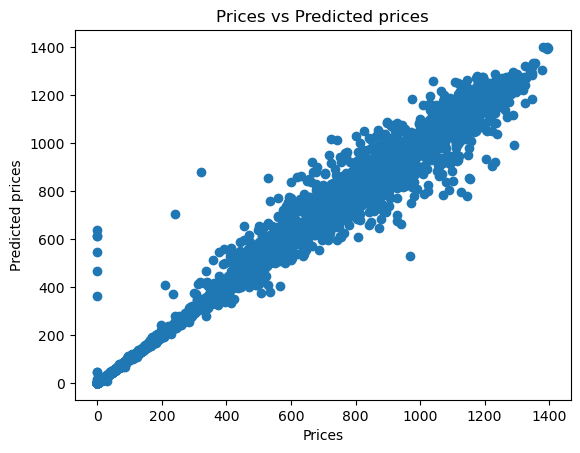

In [144]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_test,forecast_prediction)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

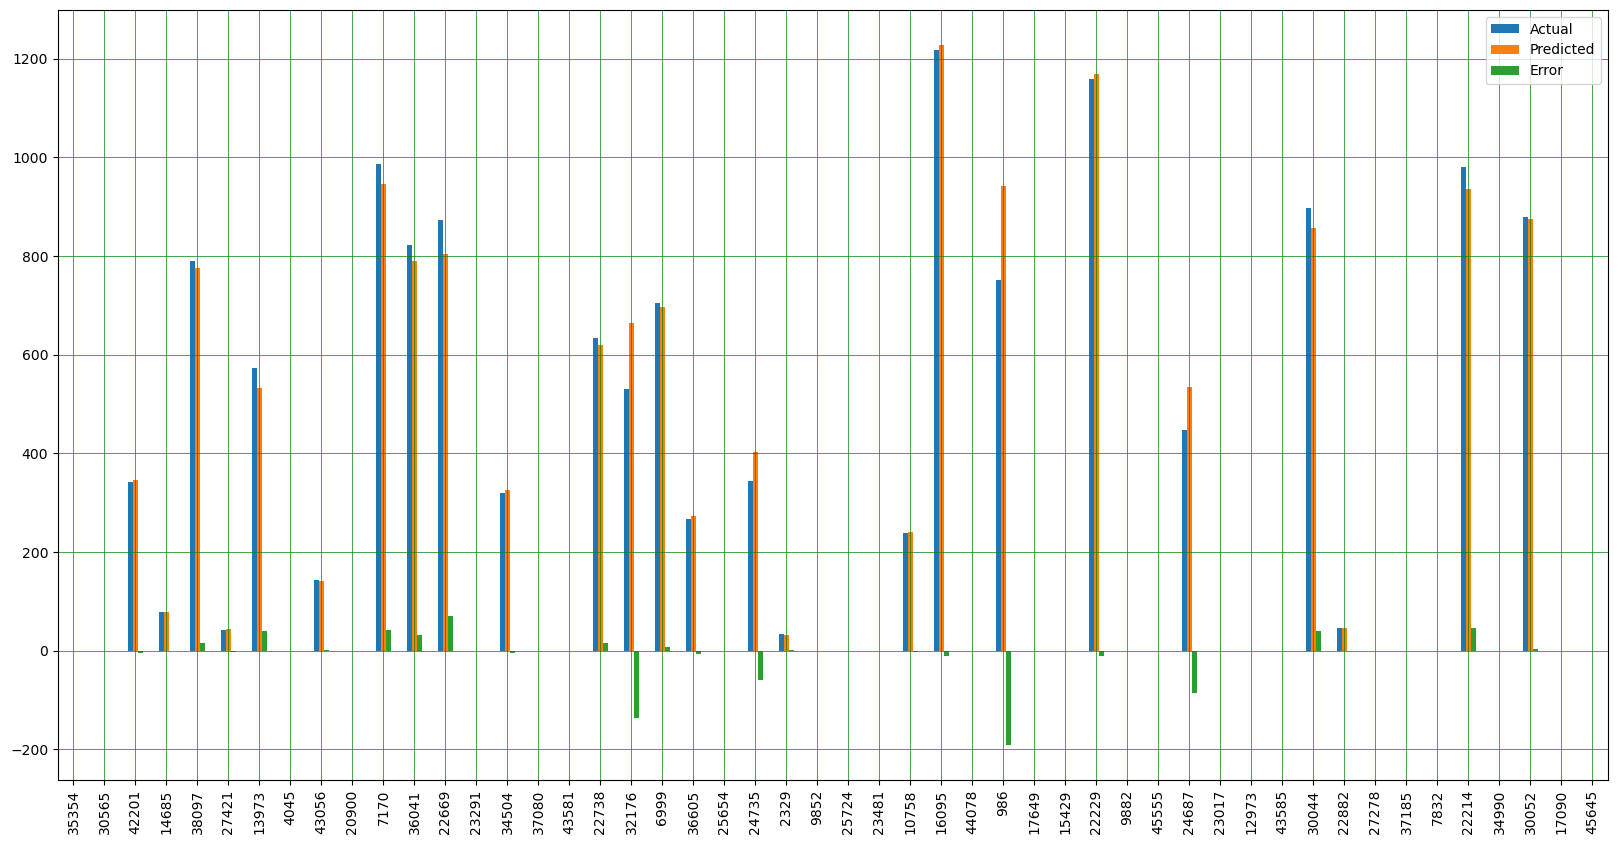

In [145]:
#plot of a bar chart using DataFrame cross_check and the first 50 rows of data

d = cross_check.head(50)
d.plot(kind='bar',figsize=(20,10))
plt.grid(which='major', linestyle='-', linewidth='0.5',color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5',color='black')
plt.show()

In [146]:
df_ml.head()

,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME,DAY,MONTH,WEEK,HOURS,MINUTES,TOTAL MINUTES PASS,DATE_STRING,SOURCE_KEY_NUMBER
0,1BY6WEcLGh8j5v7,0.000000,0.000000,0.000000,6259559.000,2020-05-15 00:00:00,25.184316,22.857507,0.000000,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,0
28850,1BY6WEcLGh8j5v7,0.000000,0.000000,7564.000000,6365374.000,2020-05-29 23:30:00,21.515432,20.651178,0.000000,2020-05-29,23:30:00,29,5,22,23,30,1410,2020-05-29,0
37210,1BY6WEcLGh8j5v7,0.000000,0.000000,7984.000000,6463663.000,2020-06-13 23:15:00,22.334206,20.330839,0.000000,2020-06-13,23:15:00,13,6,24,23,15,1395,2020-06-13,0
32260,1BY6WEcLGh8j5v7,6354.285714,621.028571,5036.857143,6377164.857,2020-05-31 14:15:00,31.199379,54.792110,0.588487,2020-05-31,14:15:00,31,5,22,14,15,855,2020-05-31,0
40510,1BY6WEcLGh8j5v7,5960.000000,584.042857,4060.571429,6471735.571,2020-06-15 12:45:00,28.772626,41.346218,0.455251,2020-06-15,12:45:00,15,6,25,12,45,765,2020-06-15,0


In [147]:
df_ml.tail()

,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME,DAY,MONTH,WEEK,HOURS,MINUTES,TOTAL MINUTES PASS,DATE_STRING,SOURCE_KEY_NUMBER
29223,zVJPv84UY57bAof,0.0,0.0,0.0,7228687.0,2020-05-30 03:30:00,21.374105,20.533020,0.0,2020-05-30,03:30:00,30,5,22,3,30,210,2020-05-30,21
29245,zVJPv84UY57bAof,0.0,0.0,0.0,7228687.0,2020-05-30 03:45:00,21.366484,20.489278,0.0,2020-05-30,03:45:00,30,5,22,3,45,225,2020-05-30,21
29267,zVJPv84UY57bAof,0.0,0.0,0.0,7228687.0,2020-05-30 04:00:00,21.413843,20.515926,0.0,2020-05-30,04:00:00,30,5,22,4,0,240,2020-05-30,21
29311,zVJPv84UY57bAof,0.0,0.0,0.0,7228687.0,2020-05-30 04:30:00,21.437061,20.568081,0.0,2020-05-30,04:30:00,30,5,22,4,30,270,2020-05-30,21
45679,zVJPv84UY57bAof,0.0,0.0,5910.0,7363272.0,2020-06-17 23:45:00,21.909288,20.427972,0.0,2020-06-17,23:45:00,17,6,25,23,45,1425,2020-06-17,21


## Performing Testing for our Model using new values.

In [148]:
# consider random values
# X is given our feature vector and y our target variable

X = data[['DAILY_YIELD', 'TOTAL_YIELD', 'AMBIENT_TEMPERATURE', 'IRRADIATION']]
y = data['AC_POWER']

#test_data = np.array([5600,6259559,25.184316,0.0,0.0])


#print(X_test)

test_data = {'DAILY_YIELD': [9163], 'TOTAL_YIELD': [7846821.0], 'AMBIENT_TEMPERATURE': [35.25248613333334],'IRRADIATION': [1.2216518466666668]}
test_data1=pd.DataFrame(test_data)
#print(test_data1)
#test_data1.shape
newpred=rfr.predict(test_data1)
print(newpred)

[1365.02639293]
